<h1 style="text-align:center;">DESAFIO 1</h1>
<h2 style="text-align:center;">Ciência e Governança de Dados</h2>

In [1]:
# Importa os pacotes/bibliotecas que serão utilizados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

## Criminalidade de Minas Gerais 

#### Dicionário de Dados (dataSet de crimes graves em Minas Gerais):

**registros:**
Quantidade de ocorrências registradas.

**natureza:**
Natureza do crime cometido, podendo ser: Estupro Consumado; Estupro de Vulnerável Consumado; Estupro de Vulnerável Tentado; Estupro Tentado; Extorsão Consumado; Extorsão Tentado; Extorsão Mediante Sequestro Consumado; Homicídio Tentado; Roubo Consumado; Roubo Tentado; Sequestro e Cárcere Privado Consumado; Sequestro e Cárcere Privado Tentado; Homicídio Consumado(registros).

**municipio:**
Nome do município em que ocorreu o crime.

**cod_municipio:**
Código do município.

**mes:**
Mês em que ocorreu o fato.

**ano:**
Ano em que ocorreu o fato.

**risp:**
Número de identificação da Região Integrada de Segurança Pública.

**rmbh:**
Se pertence ou não à Região Metropolitana de Belo Horizonte.

In [2]:
# Carrega o arquivo csv - criminalidade de minas gerais em 2024
df_criminalidadeMG_2024 = pd.read_csv('crimes_violentos_2024.csv', sep = ';')

In [3]:
# Exibe as primeiras 5 linhas do arquivo
df_criminalidadeMG_2024.head()

,registros,natureza,municipio,cod_municipio,mes,ano,risp,rmbh
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2024,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2024,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2024,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2024,12,NÃO
4,1,Estupro Consumado,ACUCENA,310050,1,2024,12,NÃO


In [4]:
# Verifica as dimensões do arquivo.
df_criminalidadeMG_2024.shape

(133068, 8)

In [5]:
# Verifica informações do arquivo
df_criminalidadeMG_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133068 entries, 0 to 133067
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   registros      133068 non-null  int64 
 1   natureza       133068 non-null  object
 2   municipio      133068 non-null  object
 3   cod_municipio  133068 non-null  int64 
 4   mes            133068 non-null  int64 
 5   ano            133068 non-null  int64 
 6   risp           133068 non-null  int64 
 7   rmbh           133068 non-null  object
dtypes: int64(5), object(3)
memory usage: 8.1+ MB


In [6]:
# Verifica se há valores nulos
df_criminalidadeMG_2024.isnull().sum()

registros        0
natureza         0
municipio        0
cod_municipio    0
mes              0
ano              0
risp             0
rmbh             0
dtype: int64

In [7]:
# Exibe o total de valores únicos de cada variável
valores_unicos = []
for i in df_criminalidadeMG_2024.columns[0:8].tolist():
    print(i, ':', len(df_criminalidadeMG_2024[i].astype(str).value_counts()))
    valores_unicos.append(len(df_criminalidadeMG_2024[i].astype(str).value_counts()))

registros : 90
natureza : 13
municipio : 853
cod_municipio : 853
mes : 12
ano : 1
risp : 19
rmbh : 2


In [8]:
# Exibe algumas medidas estatisticas.
df_criminalidadeMG_2024.describe()

,registros,cod_municipio,mes,ano,risp
count,133068.00,133068.00,133068.00,133068.00,133068.00
mean,0.24,313697.72,6.50,2024.00,10.88
std,5.81,2070.89,3.45,0.00,4.72
min,0.00,310010.00,1.00,2024.00,1.00
25%,0.00,311950.00,3.75,2024.00,7.00
50%,0.00,313730.00,6.50,2024.00,12.00
75%,0.00,315490.00,9.25,2024.00,15.00
max,668.00,317220.00,12.00,2024.00,19.00


In [9]:
# Exibe a quantidade de observações por Natureza
df_criminalidadeMG_2024.groupby(['natureza']).size()
# Todos iguais pois o crime e apontado mesmo com 0 registros para todas as cidades e meses.

natureza
Estupro Consumado                        10236
Estupro Tentado                          10236
Estupro de Vulnerável Consumado          10236
Estupro de Vulnerável Tentado            10236
Extorsão Consumado                       10236
Extorsão Mediante Sequestro Consumado    10236
Extorsão Tentado                         10236
Homicídio Consumado (Registros)          10236
Homicídio Tentado                        10236
Roubo Consumado                          10236
Roubo Tentado                            10236
Sequestro e Cárcere Privado Consumado    10236
Sequestro e Cárcere Privado Tentado      10236
dtype: int64

In [10]:
# Exibe a quantidade de observações por risp
df_criminalidadeMG_2024.groupby(['risp']).size()

risp
1       156
2      2808
3      2808
4     13416
5      4680
6      6864
7      7800
8      9048
9      2808
10     3588
11    12012
12    15132
13     9516
14     8112
15     9360
16     2652
17    11232
18     8580
19     2496
dtype: int64

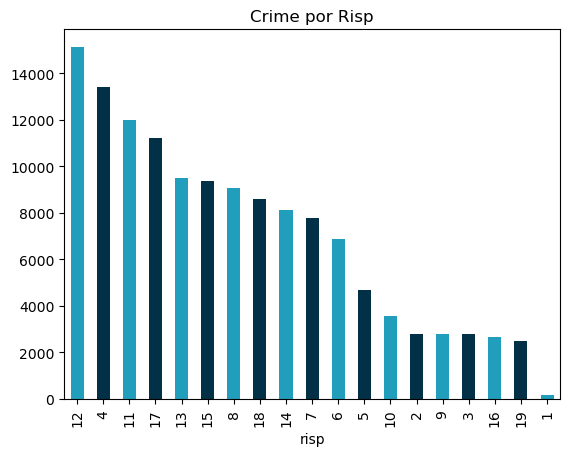

In [11]:
# Visualização através do gráfico
df_criminalidadeMG_2024.risp.value_counts().plot(kind='bar', title='Crime por Risp',color = ['#219ebc', '#023047']);

In [12]:
# Exibe a quantidade de observações de Registros 
df_criminalidadeMG_2024.groupby(['registros']).size()

registros
0      123238
1        6452
2        1579
3         622
4         337
5         188
6         121
7          64
8          70
9          52
10         36
11         30
12         27
13         16
14         15
15         10
16         16
17         23
18         11
19          3
20          8
21          6
22          9
23          5
24          5
25          5
26         12
27          2
28         12
29          6
30          7
31          7
32          2
33          1
34          4
36          3
38          2
39          1
40          1
41          2
42          2
43          1
44          2
46          1
48          1
49          1
51          1
53          1
56          2
61          2
62          1
63          2
66          1
67          1
70          1
71          1
72          1
77          1
81          1
86          1
91          1
96          2
101         1
116         1
117         1
118         1
125         3
129         1
134         1
141         1
143       

### Visualização da quantidade de registro por natureza de crime em Minas Gerais em 2024

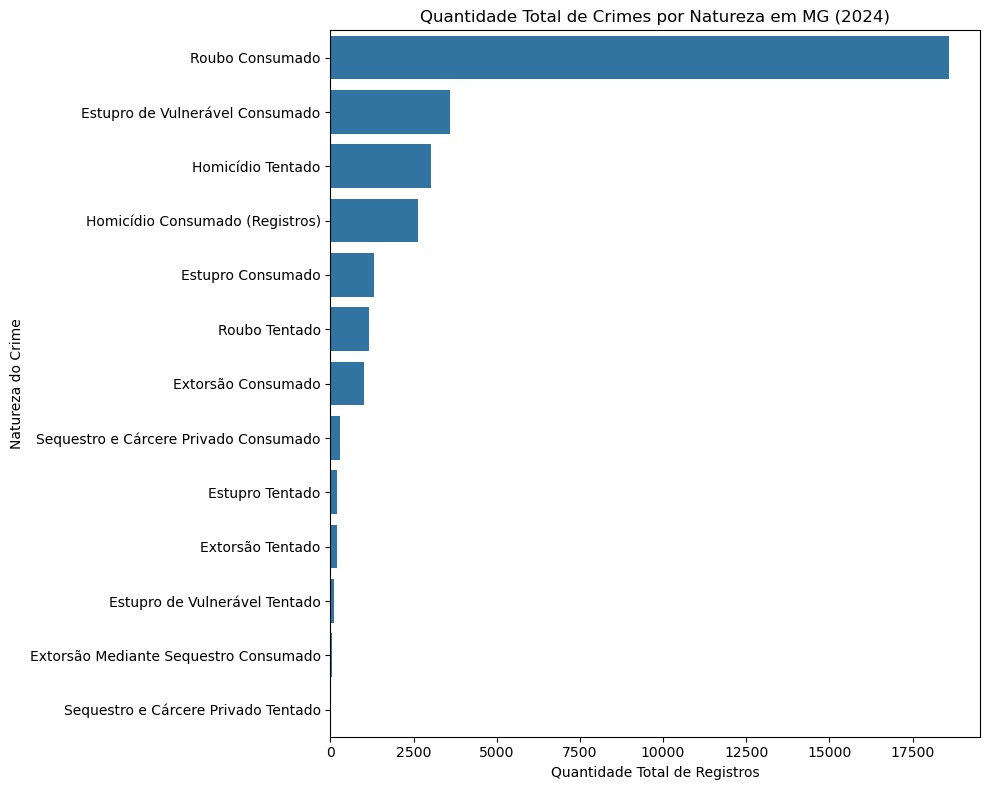

In [13]:
# Cria a tabela com a soma de registros por natureza
df_total_anual_por_crime = df_criminalidadeMG_2024.groupby('natureza')['registros'].sum().reset_index()

# Ordena os valores para melhor visualização no gráfico
df_total_anual_por_crime = df_total_anual_por_crime.sort_values(by='registros', ascending=False)

# Define um tamanho para a figura do gráfico
plt.figure(figsize=(10, 8))

# Cria o gráfico de barras
sns.barplot(data=df_total_anual_por_crime, x='registros', y='natureza')

# Adiciona os títulos e rótulos
plt.title('Quantidade Total de Crimes por Natureza em MG (2024)') 
plt.xlabel('Quantidade Total de Registros') 
plt.ylabel('Natureza do Crime') 
plt.tight_layout() 

# Exibe o gráfico
plt.show()

### Visualização da quantidade de registro por mês em Minas Gerais em 2024

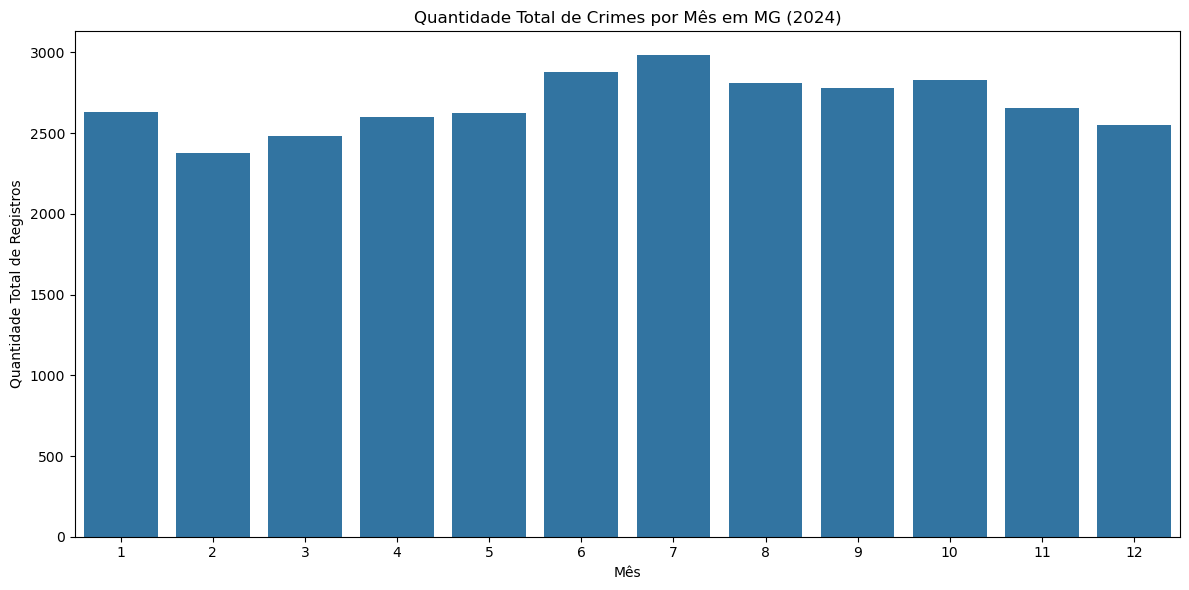

In [14]:
# Cria a tabela com a soma de registros por mês 
df_total_crime_por_mes = df_criminalidadeMG_2024.groupby('mes')['registros'].sum().reset_index()

# Define um tamanho para a figura do gráfico
plt.figure(figsize=(12, 6))

# Cria o gráfico de barras 
sns.barplot(data=df_total_crime_por_mes, x='mes', y='registros')

# Adiciona os títulos e rótulos 
plt.title('Quantidade Total de Crimes por Mês em MG (2024)') 
plt.xlabel('Mês') 
plt.ylabel('Quantidade Total de Registros') 
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Visualização da quantidade de registro por risp em Minas Gerais em 2024

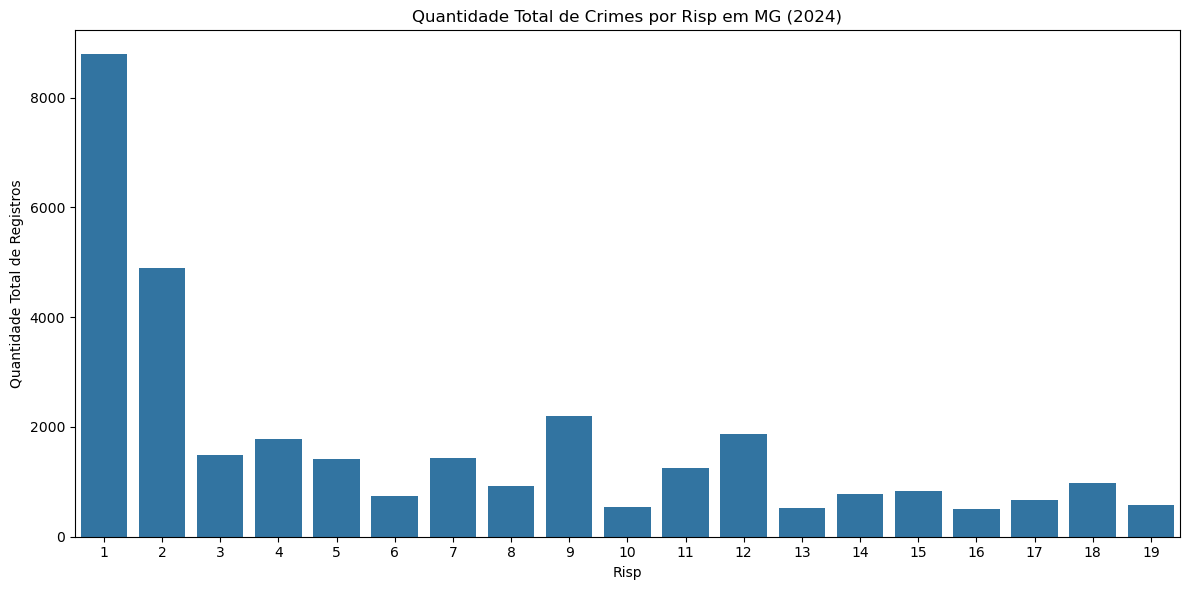

In [15]:
# Cria a tabela com a soma de registros por risp 
df_total_crime_por_risp = df_criminalidadeMG_2024.groupby('risp')['registros'].sum().reset_index()

# Define um tamanho para a figura do gráfico
plt.figure(figsize=(12, 6))

# Cria o gráfico de barras 
sns.barplot(data=df_total_crime_por_risp, x='risp', y='registros')

# Adiciona os títulos e rótulos 
plt.title('Quantidade Total de Crimes por Risp em MG (2024)') 
plt.xlabel('Risp') 
plt.ylabel('Quantidade Total de Registros') 
plt.tight_layout() 

# Exibe o gráfico
plt.show()

### Uma análise mais precisa utilizando boxplots.

In [16]:
# Cria as variáveis numéricas para criar os boxplots
variaveis_numericas = 'registros', 'risp'

In [17]:
variaveis_numericas

('registros', 'risp')

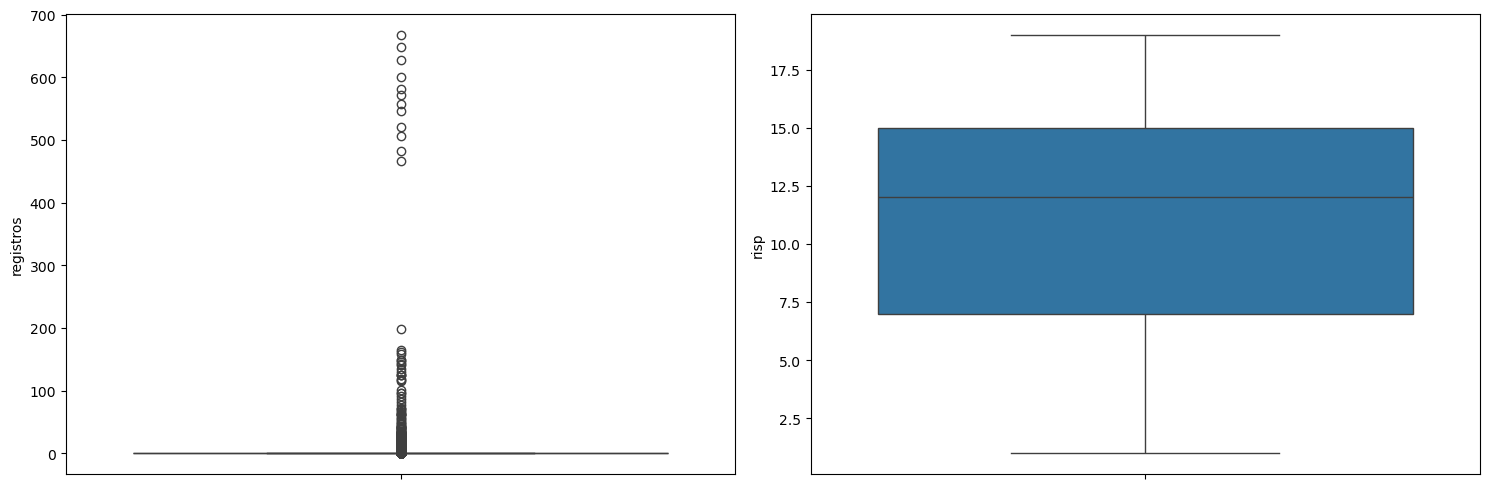

In [18]:
# Cria os parâmetros do boxplot
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True

# Seta a quantidade de boxplots
f, axes = plt.subplots(1, 2) 

# For para criar a quantidade desejada de boxplots
for i, ax in zip(variaveis_numericas[:2], axes):
    sns.boxplot(data = df_criminalidadeMG_2024, y=i, ax=ax)

# Mostra o Gráfico
plt.show()

#### Conclusão inicial: a mediana dos crimes em Minas Gerais é igual a 0, possuindo alguns picos sendo o máximo 668.

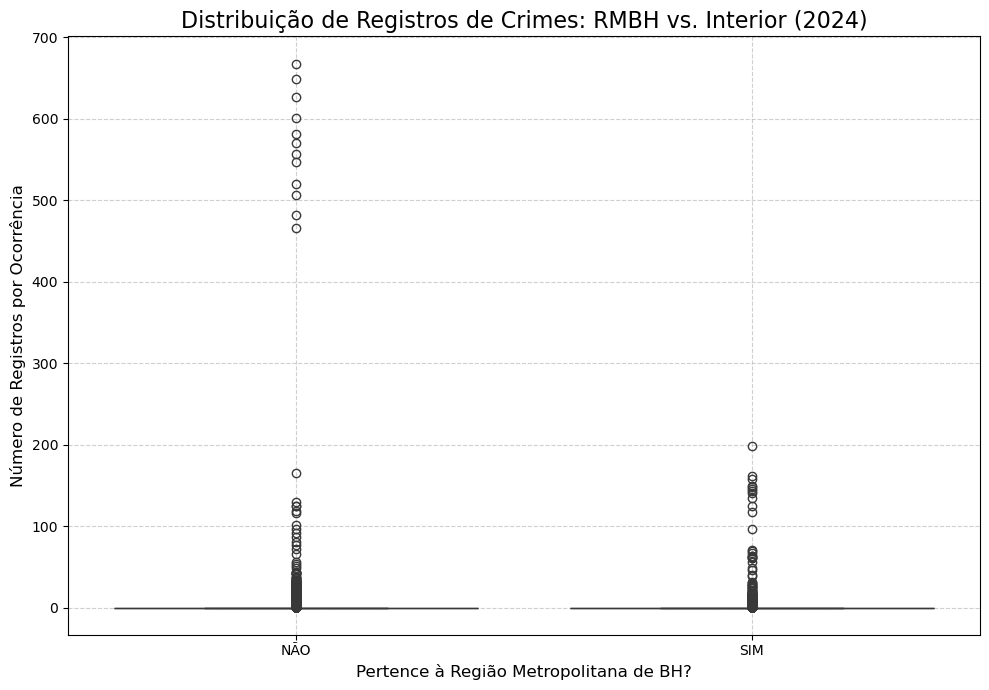

In [19]:
# Define o tamanho da figura 
plt.figure(figsize = (10, 7))

# Cria o boxplot dividindo em pertencentes e não pertecentes da região metropolitana de Belo Horizonte
sns.boxplot(data = df_criminalidadeMG_2024, x='rmbh', y='registros', hue='rmbh', palette="viridis", legend=False)

# Adiciona títulos e rótulos 
plt.title('Distribuição de Registros de Crimes: RMBH vs. Interior (2024)', fontsize=16)
plt.xlabel('Pertence à Região Metropolitana de BH?', fontsize=12)
plt.ylabel('Número de Registros por Ocorrência', fontsize=12)

# Adiciona uma grade para facilitar a leitura dos valores
plt.grid(True, linestyle='--', alpha=0.6)

# Exibe o gráfico
plt.show()

### Análise a partir do boxplot pertencente a região metropolitana de Belo Horizonte e não pertencente: 
#### Mediana de ocorrências de crimes = 0.
#### Mostra também que a região não metropolitana de Belo Horizonte é onde se concentra as maiores ocorrências de crimes.
#### Essa afirmação não parece muito correta por isso abaixo será verificado os locais das 15 maiores ocorrências de crimes.

In [20]:
# Ordena o DataFrame pela coluna 'registros', do maior para o menor
df_maiores_crimes = df_criminalidadeMG_2024.sort_values(by='registros', ascending=False)

# Exibe as 15 ocorrências com o maior número de registros
print("--- As 15 Ocorrências com Maior Número de Registros em 2024 ---")
print(df_maiores_crimes.head(15))


--- As 15 Ocorrências com Maior Número de Registros em 2024 ---
        registros         natureza       municipio  cod_municipio  mes   ano  \
58069         668  Roubo Consumado  BELO HORIZONTE         310620    6  2024   
68305         649  Roubo Consumado  BELO HORIZONTE         310620    7  2024   
78541         627  Roubo Consumado  BELO HORIZONTE         310620    8  2024   
99013         601  Roubo Consumado  BELO HORIZONTE         310620   10  2024   
88777         582  Roubo Consumado  BELO HORIZONTE         310620    9  2024   
109249        571  Roubo Consumado  BELO HORIZONTE         310620   11  2024   
47833         557  Roubo Consumado  BELO HORIZONTE         310620    5  2024   
119485        547  Roubo Consumado  BELO HORIZONTE         310620   12  2024   
6889          520  Roubo Consumado  BELO HORIZONTE         310620    1  2024   
37597         507  Roubo Consumado  BELO HORIZONTE         310620    4  2024   
17125         482  Roubo Consumado  BELO HORIZONTE      

#### Como pode ser observado as principais ocorrências de crimes aconteceram na capital Belo Horizonte e não no interior.
#### Isso ocorre pois Belo Horizonte como observado, é listado como não pertecente a região Metropolinada de Belo Horizonte.
#### Portanto para uma melhor análise deve-se criar um novo boxplot dividindo em interior, região metropolitana e Belo Horizonte.

--- Valores Estatísticos dos Boxplots por Região ---
                          count  mean    std  min  25%   50%   75%    max
regiao                                                                   
Belo Horizonte           156.00 56.32 148.75 0.00 3.00 15.00 28.00 668.00
Interior              127764.00  0.13   1.39 0.00 0.00  0.00  0.00 165.00
RMBH (Outras Cidades)   5148.00  1.23   7.89 0.00 0.00  0.00  0.00 198.00


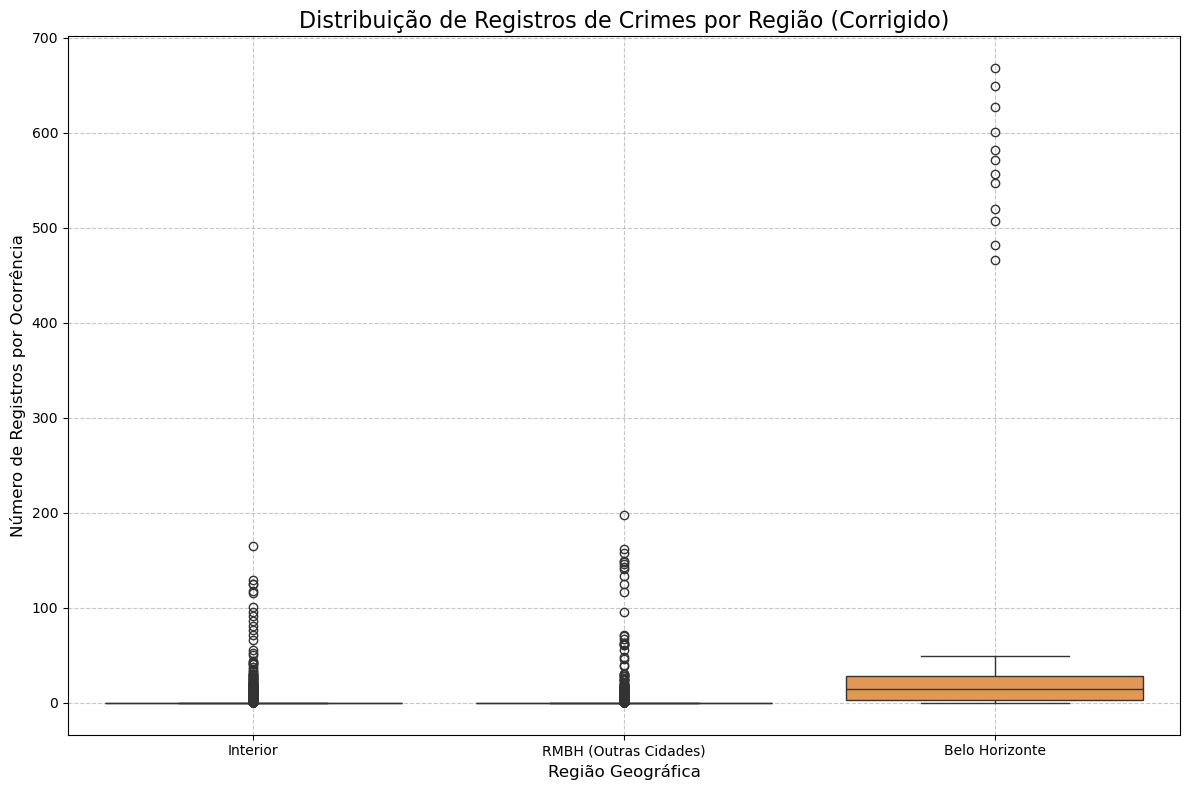

In [21]:
# Classifica todos como 'Interior'
df_criminalidadeMG_2024['regiao'] = 'Interior'

# Classifica quem é região metropolitana
df_criminalidadeMG_2024['regiao'] = np.where(df_criminalidadeMG_2024['rmbh'] == 'SIM', 'RMBH (Outras Cidades)', df_criminalidadeMG_2024['regiao'])

# Classifica Belo Horizonte
df_criminalidadeMG_2024['regiao'] = np.where(df_criminalidadeMG_2024['municipio'] == 'BELO HORIZONTE', 'Belo Horizonte', df_criminalidadeMG_2024['regiao'])

# Agrupa os valores do boxplot
valores_boxplot = df_criminalidadeMG_2024.groupby('regiao')['registros'].describe()

# Imprime a tabela com os valores do boxplot
print("--- Valores Estatísticos dos Boxplots por Região ---")
print(valores_boxplot)

plt.figure(figsize=(12, 8))

# Cria o boxplot usando a nova coluna 'regiao'
sns.boxplot(data = df_criminalidadeMG_2024, x='regiao', y='registros', hue='regiao', order=['Interior', 'RMBH (Outras Cidades)', 'Belo Horizonte'], palette='plasma', legend=False)

# Adiciona títulos e rótulos
plt.title('Distribuição de Registros de Crimes por Região (Corrigido)', fontsize=16)
plt.xlabel('Região Geográfica', fontsize=12)
plt.ylabel('Número de Registros por Ocorrência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.show()

### Com esse novo boxplot e as tabelas de valores estatísticos podemos tirar algumas conclusões:
#### Mesmo o interior possuindo o maior número de cidades, possui a menor média de ocorrências 0.13, tendo como seu maior registro 165.
#### Já a região metropolitana ainda possui a mediana de registros sendo 0, porém possui média de 1.23 ocorrências e 198 como seu maior registro.
#### Belo Horizonte por sua vez possui uma média muito maior de 56.32 ocorrências, uma mediana de 15 e um pico de 668 registros.

### A partir da análise do ano de 2024, para uma análise mais precisa de evolução será análisado os anos anteriores (2019-2023)

In [22]:
# Carrega os arquivo csv de 2019-2023
df_criminalidadeMG_2019= pd.read_csv('crimes_violentos_2019.csv', sep = ';')
df_criminalidadeMG_2020= pd.read_csv('crimes_violentos_2020.csv', sep = ';')
df_criminalidadeMG_2021= pd.read_csv('crimes_violentos_2021.csv', sep = ';')
df_criminalidadeMG_2022= pd.read_csv('crimes_violentos_2022.csv', sep = ';')
df_criminalidadeMG_2023= pd.read_csv('crimes_violentos_2023.csv', sep = ';')

In [23]:
# Carrega novamente o dataframe de 2024
df_criminalidadeMG_2024 = pd.read_csv('crimes_violentos_2024.csv', sep = ';')

# Cria uma lista com todos os dataframes de todos os anos para unir
lista_de_dataframes = [
    df_criminalidadeMG_2019,
    df_criminalidadeMG_2020,
    df_criminalidadeMG_2021,
    df_criminalidadeMG_2022,
    df_criminalidadeMG_2023,
    df_criminalidadeMG_2024  
]

# Une os dataframes
df_criminalidadeMG_completo = pd.concat(lista_de_dataframes, ignore_index=True)

# Mostra as informações do dataframe completo
print("--- Informações do DataFrame Completo ---")
df_criminalidadeMG_completo.info()

# Imprime as ultimas linhas para verificação
print("\n--- Últimas Linhas do DataFrame ---")
print(df_criminalidadeMG_completo.tail())

--- Informações do DataFrame Completo ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798408 entries, 0 to 798407
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   registros      798408 non-null  int64 
 1   natureza       798408 non-null  object
 2   municipio      798408 non-null  object
 3   cod_municipio  798408 non-null  int64 
 4   mes            798408 non-null  int64 
 5   ano            798408 non-null  int64 
 6   risp           798408 non-null  int64 
 7   rmbh           798408 non-null  object
dtypes: int64(5), object(3)
memory usage: 48.7+ MB

--- Últimas Linhas do DataFrame ---
        registros                         natureza               municipio  \
798403          0  Homicídio Consumado (Registros)             VIRGOLANDIA   
798404          0  Homicídio Consumado (Registros)  VISCONDE DO RIO BRANCO   
798405          0  Homicídio Consumado (Registros)            VOLTA GRANDE   
798406  

In [24]:
# Verifica as dimensões do arquivo.
df_criminalidadeMG_completo.shape

(798408, 8)

In [25]:
# Verifica se há valores nulos
df_criminalidadeMG_completo.isnull().sum()

registros        0
natureza         0
municipio        0
cod_municipio    0
mes              0
ano              0
risp             0
rmbh             0
dtype: int64

In [26]:
# Exibe o total de valores únicos de cada variável
valores_unicos = []
for i in df_criminalidadeMG_completo.columns[0:8].tolist():
    print(i, ':', len(df_criminalidadeMG_completo[i].astype(str).value_counts()))
    valores_unicos.append(len(df_criminalidadeMG_completo[i].astype(str).value_counts()))

registros : 281
natureza : 13
municipio : 853
cod_municipio : 853
mes : 12
ano : 6
risp : 19
rmbh : 2


### Arquivo completo criado e verificado corretamente.
### Agora será feita a análise principal desejada.

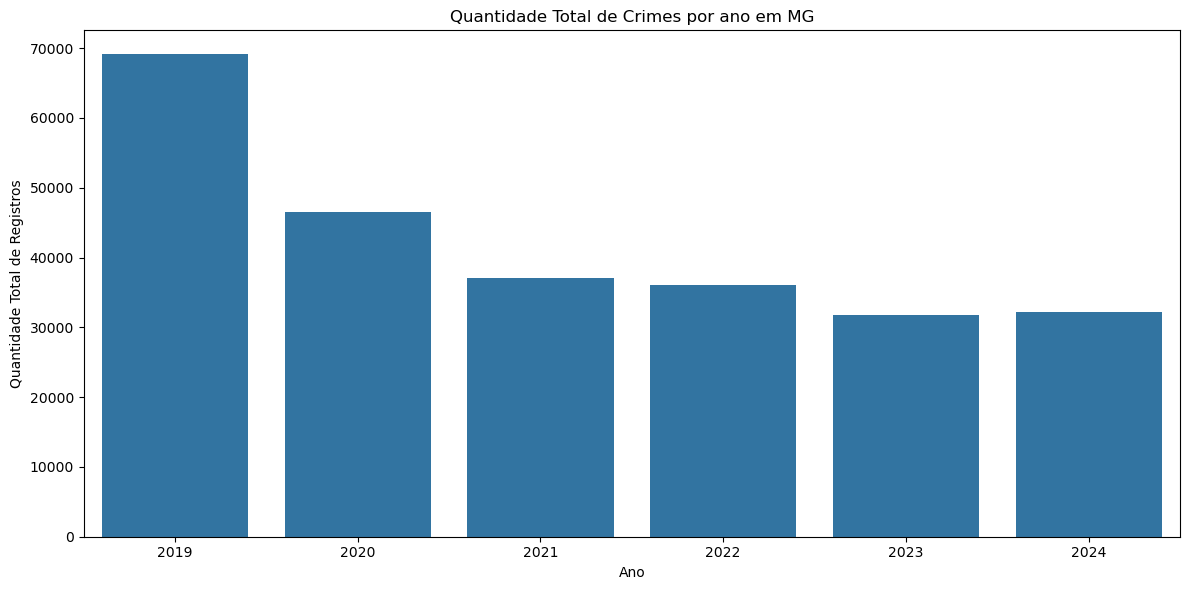

In [27]:
# Cria a tabela com a soma de registros por ano
df_total_crime_por_ano = df_criminalidadeMG_completo.groupby('ano')['registros'].sum().reset_index()

# Define um tamanho para a figura do gráfico
plt.figure(figsize=(12, 6))

# Cria o gráfico de barras 
sns.barplot(data=df_total_crime_por_ano, x='ano', y='registros')

# Adiciona os títulos e rótulos 
plt.title('Quantidade Total de Crimes por ano em MG') 
plt.xlabel('Ano') 
plt.ylabel('Quantidade Total de Registros') 
plt.tight_layout() 

# Exibe o gráfico
plt.show()

### A primeira observação possível de fazer é que a quantidade total de crimes diminui consideralmente entre 2019 e 2024.
### Para uma observação mais fácil será utilizado um gráfico de linha.

--- Total de Registros de Crimes por Ano ---
    ano  registros
0  2019      69095
1  2020      46517
2  2021      37008
3  2022      36076
4  2023      31766
5  2024      32209


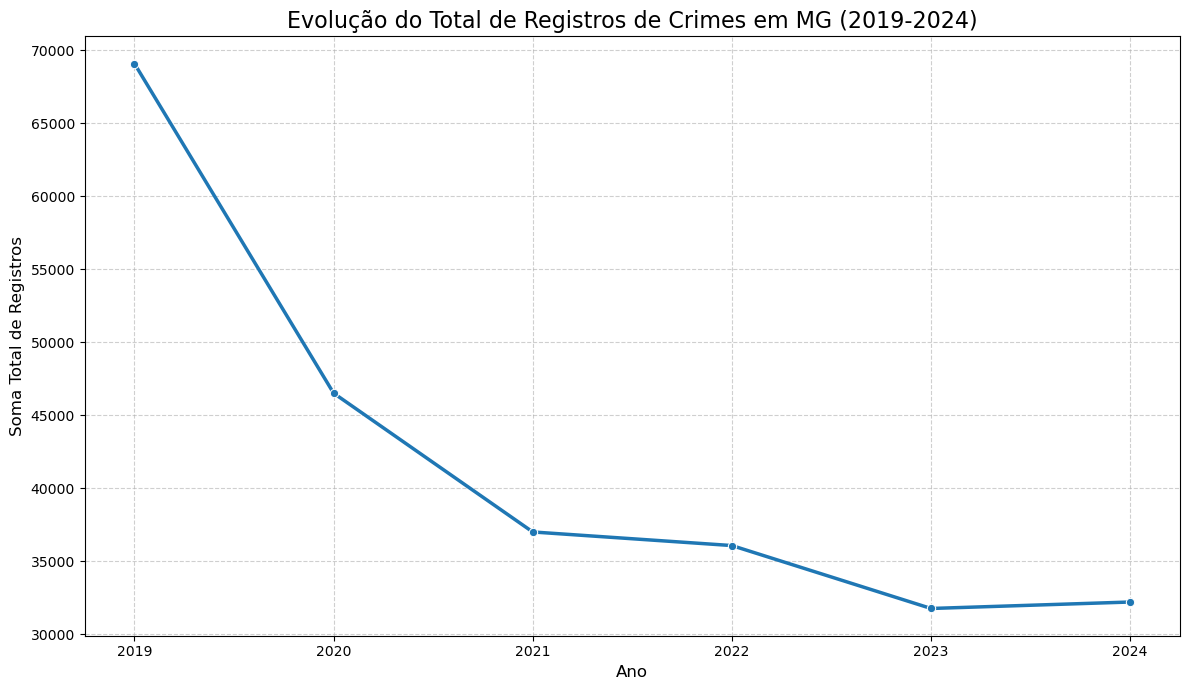

In [28]:
# Cria a tabela com a soma de registros por ano
df_total_crime_por_ano = df_criminalidadeMG_completo.groupby('ano')['registros'].sum().reset_index()

# Exibe a tabela com os valores totais para verficar os números
print("--- Total de Registros de Crimes por Ano ---")
print(df_total_crime_por_ano)

# Cria o gráfico de linhas para visualizar a tendência
plt.figure(figsize = (12, 7))
sns.lineplot(data = df_total_crime_por_ano, x='ano', y='registros', marker='o', linewidth=2.5)

# Adiciona títulos e rótulos
plt.title('Evolução do Total de Registros de Crimes em MG (2019-2024)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Soma Total de Registros', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Garante que todos os anos apareçam no eixo X
plt.xticks(df_total_crime_por_ano['ano'])

# Exibe o gráfico
plt.show()

### Com isso verificamos que houve uma grande queda na quantidade total de crimes entre 2019 e 2020, e também uma queda considerável entre 2020 e 2021.
### Houve uma pequena establização entre 2021 e 2022, com uma leve queda entre 2022 e 2023 e um pequeno aumento entre 2023 e 2024.

Valores Estatísticos Anuais dos Boxplots por Região

ESTATÍSTICAS PARA O ANO DE 2019
                          count   mean    std  min  25%   50%   75%     max
regiao                                                                     
Belo Horizonte           156.00 126.34 378.91 0.00 2.00 15.50 32.00 1798.00
Interior              127764.00   0.25   3.32 0.00 0.00  0.00  0.00  285.00
RMBH (Outras Cidades)   5148.00   3.35  29.31 0.00 0.00  0.00  1.00  736.00

ESTATÍSTICAS PARA O ANO DE 2020
                          count  mean    std  min  25%   50%   75%     max
regiao                                                                    
Belo Horizonte           156.00 84.39 254.18 0.00 1.75 12.00 29.00 1563.00
Interior              127764.00  0.17   2.04 0.00 0.00  0.00  0.00  190.00
RMBH (Outras Cidades)   5148.00  2.23  19.48 0.00 0.00  0.00  0.00  516.00

ESTATÍSTICAS PARA O ANO DE 2021
                          count  mean    std  min  25%   50%   75%    max
regiao              

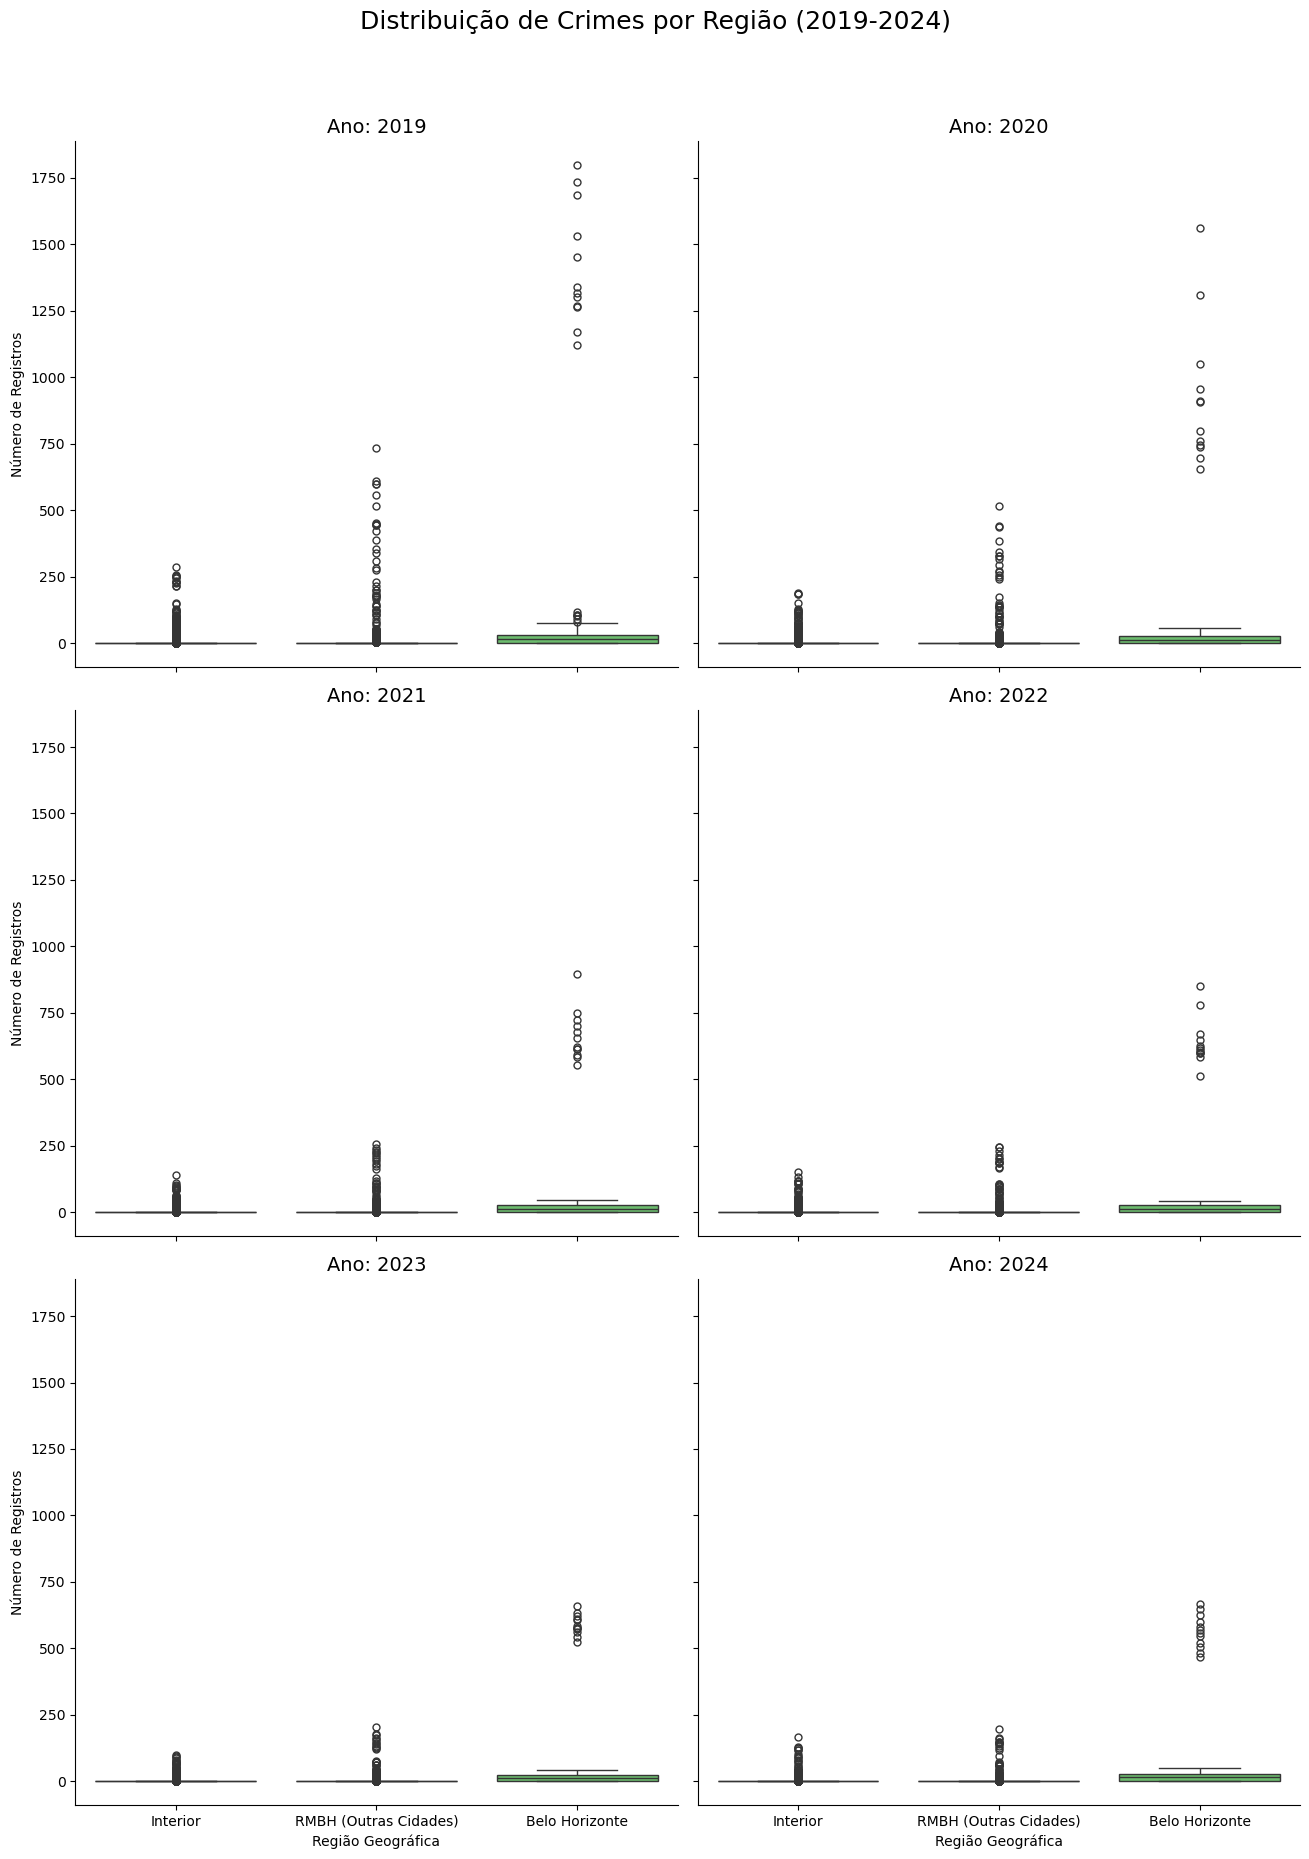

In [29]:
# Classifica todos como 'Interior'
df_criminalidadeMG_completo['regiao'] = 'Interior'

# Classifica quem e região metropolitana
df_criminalidadeMG_completo['regiao'] = np.where(df_criminalidadeMG_completo['rmbh'] == 'SIM', 'RMBH (Outras Cidades)', df_criminalidadeMG_completo['regiao'])

# Classifica Belo Horizonte
df_criminalidadeMG_completo['regiao'] = np.where(df_criminalidadeMG_completo['municipio'] == 'BELO HORIZONTE', 'Belo Horizonte', df_criminalidadeMG_completo['regiao'])

# Agrupa os dados para calcular as estatísticas
valores_boxplot_anuais = df_criminalidadeMG_completo.groupby(['ano', 'regiao'])['registros'].describe()

print("Valores Estatísticos Anuais dos Boxplots por Região")
# Pega a lista de anos únicos do índice da nossa tabela
anos_unicos = valores_boxplot_anuais.index.get_level_values('ano').unique()

# For para imprimir formatado cada tabela
for ano in anos_unicos:
    print(f"\nESTATÍSTICAS PARA O ANO DE {ano}")
    print(valores_boxplot_anuais.loc[ano])

# Usa o catplot que cria múltiplo boxplots um por ano
g = sns.catplot(data=df_criminalidadeMG_completo, x = 'regiao', y = 'registros', hue='regiao', legend=False, col='ano', kind='box',         
                order=['Interior', 'RMBH (Outras Cidades)', 'Belo Horizonte'], palette='viridis', col_wrap=2, height=6, aspect=1.1)

# Adiciona títulos e rótulos
g.fig.suptitle('Distribuição de Crimes por Região (2019-2024)', y=1.03, fontsize=18)
g.set_axis_labels("Região Geográfica", "Número de Registros")
g.set_titles("Ano: {col_name}", size=14)
plt.tight_layout()

# Mostra o gráfico
plt.show()

### Conclusões finais sobre a segurança pública em Minas gerais e seus impactos socioeconômicos:
**Geral:** 
Assim como observado em 2024, a quantidade média de crimes no interior é sempre inferior a quantidade média de crimes na região metropolitana que é inferior a quantidade média de crimes em Belo Horizonte que por sua vez, é muito maior. A mediana também é sempre maior em Belo Horizonte quando comparado com as outras regiões e o maior indíce também pertence a Belo Horizonte, porém em todas as regiões existe uma considerável queda de crimes de 2019 até 2024. Agora será feita a análise por região.

**Interior:**
O interior do estado possui o a menor média de crimes como era esperado, possuindo em 2019 uma média de 0,25 crimes que vêm caindo, atingindo uma baixa de 0,13 em 2023 que se manteve para 2024. A mediana se manteve em 0 em todos os anos, isso quer dizer que a grande parte dos crimes no interior não possui ocorrência. Já o maior índice teve alta em 2019 com 285 crimes, tendo o menor valor em 2023 com 98 crimes e voltou a crescer em 2024 com 165 crimes.\
\
Impacto socioeconômico: A tranquilidade (mediana zero) é o maior ativo socioeconômico do interior. Ela é crucial para a qualidade de vida, atraindo famílias e aposentados, e para setores como o turismo e o agronegócio. A flutuação nos picos de violência, no entanto, representa um risco direto para essa estabilidade. Um único evento de alta intensidade em uma cidade pequena pode gerar uma percepção de insegurança desproporcional, afugentando investimentos e afetando a economia local, que é mais sensível a choques.

**Região metropolitana:** 
Na média de crimes da região metropolitana ocorreu o mesmo que no interior, teve como maior média 2019 com 3,35 crimes com baixa em 2023 com 1,23 que se manteve em 2024. A mediana também se manteve em 0 todos os anos. Já o maior índice de ocorrências foi em 2019 com 736 e teve seu menor valor em 2024 com 198 ocorrências.\
\
Impacto socioeconômico: A drástica redução nos picos de violência na RMBH é uma notícia extremamente positiva para o desenvolvimento econômico. Esta região, muitas vezes industrial e logística, se beneficia diretamente de uma maior segurança. A queda na criminalidade pode reduzir os custos operacionais para empresas (menos perdas com roubos de carga, por exemplo) e valorizar o mercado imobiliário, tornando as cidades do entorno de BH mais atrativas para moradia e para a instalação de novos negócios.

**Belo Horizonte:**
Como era de se esperar Belo Horizonte foi a pior região em todos os quesitos, teve sua alta de média em 2019 com 126,34 crimes e mesmo que tenha abaixado consideravelmente atingindo 56,32 em 2024 ainda é um valor considerávelmente maior em comparação com as demais regiões. A mediana diferentemente das outras regiões que se manteve 0 todos os anos, variou tendo pico em 2019 com 15,5 e baixa em 2020 com 12, porém voltou a crescer atingindo 15 em 2024. Por fim o maior índice foi de 1798 em 2019 com uma grande queda ate 2023 que atingiu 661, com um pequeno aumento em 2024 que chegou a 668 crimes.\
\
Impacto socioeconômico: Os dados de Belo Horizonte revelam um custo socioeconômico crônico. Uma mediana de 15 não é apenas um número, ela se traduz em um "imposto de insegurança" pago por todos. Para os negócios significa custos fixos mais altos com segurança, perdas maiores e um ambiente hostil para o comércio, especialmente o noturno. Para a população impacta diretamente a qualidade de vida, restringindo a liberdade e o lazer, e gerando custos com saúde mental. A percepção de insegurança pode levar à desvalorização imobiliária em certas áreas e à fuga de talentos para outras cidades. E para o governo essa "normalidade crítica" exige um investimento contínuo e massivo em policiamento e no sistema de justiça, drenando recursos que poderiam ser alocados em saúde, educação e infraestrutura, criando um ciclo vicioso difícil de quebrar.

## Educação em Minas gerais 

#### Será utilizado o dataSet do Inep da educação básica e superior no Brasil, porém a análise será restringida a Minas Gerais.

### Educação Básica

In [30]:
# Carrega os arquivos csv de educação básica de 2019 ate 2024
df_educacao_basicaMG_2024 = pd.read_csv('microdados_ed_basica_2024.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_basicaMG_2023 = pd.read_csv('microdados_ed_basica_2023.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_basicaMG_2022 = pd.read_csv('microdados_ed_basica_2022.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_basicaMG_2021 = pd.read_csv('microdados_ed_basica_2021.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_basicaMG_2020 = pd.read_csv('microdados_ed_basica_2020.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_basicaMG_2019 = pd.read_csv('microdados_ed_basica_2019.csv', sep = ';', encoding = 'latin-1',low_memory = False)

In [31]:
# Verifica as dimensões do csv
df_educacao_basicaMG_2019.shape

(228521, 370)

In [32]:
# Verifica as dimensões do csv
df_educacao_basicaMG_2020.shape

(224229, 370)

In [33]:
# Verifica as dimensões do csv
df_educacao_basicaMG_2021.shape

(221140, 370)

In [34]:
# Verifica as dimensões do csv
df_educacao_basicaMG_2022.shape

(224649, 385)

In [35]:
# Verifica as dimensões do csv
df_educacao_basicaMG_2023.shape

(217625, 408)

In [36]:
# Verifica as dimensões do csv
df_educacao_basicaMG_2024.shape

(215545, 426)

#### Por serem de anos diferentes cada dataframe possui colunas distintas, variando em quantidade e nomenclatura. Portanto, para facilitar a análise um novo dataframe sera criado apenas utilizando as tabelas em comum necessárias.

In [37]:
# Salva os anos do dataSet
anos_para_analise = [2019, 2020, 2021, 2022, 2023, 2024]

# Salva o nome das colunas necessárias
colunas_originais = [ 
    'NU_ANO_CENSO', 'CO_MUNICIPIO', 'NO_UF', 'SG_UF', 'CO_UF', 'NO_MUNICIPIO',
    'QT_MAT_BAS', 'QT_MAT_INF', 'QT_MAT_FUND', 'QT_MAT_MED', 'QT_MAT_PROF',
    'QT_MAT_EJA', 'QT_MAT_ESP', 'QT_MAT_BAS_FEM', 'QT_MAT_BAS_MASC',
    'QT_MAT_BAS_0_3', 'QT_MAT_BAS_4_5', 'QT_MAT_BAS_6_10', 'QT_MAT_BAS_11_14',
    'QT_MAT_BAS_15_17', 'QT_MAT_BAS_18_MAIS', 'QT_MAT_BAS_ND', 'QT_MAT_BAS_BRANCA',
    'QT_MAT_BAS_PRETA', 'QT_MAT_BAS_PARDA', 'QT_MAT_BAS_AMARELA', 'QT_MAT_BAS_INDIGENA'
]

# Cria uma lista auxiliar
lista_dfs_anuais = []

# For para criar o salvar apenas as colunas específicas de cada dataSet
for ano in anos_para_analise:
    caminho_arquivo = f'microdados_ed_basica_{ano}.csv'
    # Lê apenas as colunas especificadas
    df_anual = pd.read_csv(caminho_arquivo, sep = ';',encoding = 'latin-1',  low_memory = False, usecols = colunas_originais)
    # Adiciona o DataFrame filtrado à lista
    lista_dfs_anuais.append(df_anual)

# Cria o nome dataSet reduzido
df_educacao_final = pd.concat(lista_dfs_anuais, ignore_index = True)

In [38]:
# Mostra as 5 primeiras linhas do dataSet
df_educacao_final.head()

,NU_ANO_CENSO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,QT_MAT_BAS,QT_MAT_INF,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_EJA,QT_MAT_ESP,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_MAT_BAS_ND,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_MAT_BAS_0_3,QT_MAT_BAS_4_5,QT_MAT_BAS_6_10,QT_MAT_BAS_11_14,QT_MAT_BAS_15_17,QT_MAT_BAS_18_MAIS
0,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,7.00,0.00,7.00,0.00,0.00,0.00,0.00,3.00,4.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,7.00,0.00,0.00,0.00
1,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,227.00,0.00,0.00,0.00,0.00,227.00,3.00,118.00,109.00,0.00,66.00,11.00,138.00,0.00,12.00,0.00,0.00,0.00,0.00,25.00,202.00
2,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,20.00,0.00,20.00,0.00,0.00,0.00,0.00,13.00,7.00,0.00,9.00,0.00,11.00,0.00,0.00,0.00,0.00,19.00,0.00,1.00,0.00
3,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,112.00,10.00,102.00,0.00,0.00,0.00,3.00,46.00,66.00,11.00,12.00,6.00,55.00,0.00,28.00,0.00,16.00,53.00,35.00,8.00,0.00
4,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
# Renomeia as colunas do dataSet para maior clareza
renomear_colunas = {
    'NU_ANO_CENSO': 'ano',
    'CO_MUNICIPIO': 'cod_municipio',
    'NO_UF': 'nome_estado',
    'SG_UF': 'sigla_estado',
    'CO_UF': 'cod_estado',
    'NO_MUNICIPIO': 'nome_municipio',
    'QT_MAT_BAS': 'matriculas_basica_total',
    'QT_MAT_INF': 'matriculas_infantil',
    'QT_MAT_FUND': 'matriculas_fundamental',
    'QT_MAT_MED': 'matriculas_medio',
    'QT_MAT_PROF': 'matriculas_profissional',
    'QT_MAT_EJA': 'matriculas_eja',
    'QT_MAT_ESP': 'matriculas_especial',
    'QT_MAT_BAS_FEM': 'matriculas_basica_feminino',
    'QT_MAT_BAS_MASC': 'matriculas_basica_masculino',
    'QT_MAT_BAS_0_3': 'matriculas_basica_0_3_anos',
    'QT_MAT_BAS_4_5': 'matriculas_basica_4_5_anos',
    'QT_MAT_BAS_6_10': 'matriculas_basica_6_10_anos',
    'QT_MAT_BAS_11_14': 'matriculas_basica_11_14_anos',
    'QT_MAT_BAS_15_17': 'matriculas_basica_15_17_anos',
    'QT_MAT_BAS_18_MAIS': 'matriculas_basica_18_mais_anos',
    'QT_MAT_BAS_ND': 'matriculas_basica_cor/raca_nd',
    'QT_MAT_BAS_BRANCA': 'matriculas_basica_cor/raca_branca',
    'QT_MAT_BAS_PRETA': 'matriculas_basica_cor/raca_preta',
    'QT_MAT_BAS_PARDA': 'matriculas_basica_cor_raca_parda',
    'QT_MAT_BAS_AMARELA': 'matriculas_basica_cor_raca_amarela',
    'QT_MAT_BAS_INDIGENA': 'matriculas_basica_cor/raca_indigena'
}

df_educacao_final = df_educacao_final.rename(columns = renomear_colunas)

In [40]:
# Mostra as 5 primeiras linhas do dataSet
df_educacao_final.head()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,matriculas_basica_total,matriculas_infantil,matriculas_fundamental,matriculas_medio,matriculas_profissional,matriculas_eja,matriculas_especial,matriculas_basica_feminino,matriculas_basica_masculino,matriculas_basica_cor/raca_nd,matriculas_basica_cor/raca_branca,matriculas_basica_cor/raca_preta,matriculas_basica_cor_raca_parda,matriculas_basica_cor_raca_amarela,matriculas_basica_cor/raca_indigena,matriculas_basica_0_3_anos,matriculas_basica_4_5_anos,matriculas_basica_6_10_anos,matriculas_basica_11_14_anos,matriculas_basica_15_17_anos,matriculas_basica_18_mais_anos
0,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,7.00,0.00,7.00,0.00,0.00,0.00,0.00,3.00,4.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,7.00,0.00,0.00,0.00
1,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,227.00,0.00,0.00,0.00,0.00,227.00,3.00,118.00,109.00,0.00,66.00,11.00,138.00,0.00,12.00,0.00,0.00,0.00,0.00,25.00,202.00
2,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,20.00,0.00,20.00,0.00,0.00,0.00,0.00,13.00,7.00,0.00,9.00,0.00,11.00,0.00,0.00,0.00,0.00,19.00,0.00,1.00,0.00
3,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,112.00,10.00,102.00,0.00,0.00,0.00,3.00,46.00,66.00,11.00,12.00,6.00,55.00,0.00,28.00,0.00,16.00,53.00,35.00,8.00,0.00
4,2019,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [41]:
# Mostra as informações do arquivo
df_educacao_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331709 entries, 0 to 1331708
Data columns (total 27 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   ano                                  1331709 non-null  int64  
 1   nome_estado                          1331709 non-null  object 
 2   sigla_estado                         1331709 non-null  object 
 3   cod_estado                           1331709 non-null  int64  
 4   nome_municipio                       1331709 non-null  object 
 5   cod_municipio                        1331709 non-null  int64  
 6   matriculas_basica_total              1209998 non-null  float64
 7   matriculas_infantil                  1209998 non-null  float64
 8   matriculas_fundamental               1209998 non-null  float64
 9   matriculas_medio                     1209998 non-null  float64
 10  matriculas_profissional              1209998 non-null  float64
 11

In [42]:
# Mostra as 5 últimas linhas do dataSet
df_educacao_final.tail()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,matriculas_basica_total,matriculas_infantil,matriculas_fundamental,matriculas_medio,matriculas_profissional,matriculas_eja,matriculas_especial,matriculas_basica_feminino,matriculas_basica_masculino,matriculas_basica_cor/raca_nd,matriculas_basica_cor/raca_branca,matriculas_basica_cor/raca_preta,matriculas_basica_cor_raca_parda,matriculas_basica_cor_raca_amarela,matriculas_basica_cor/raca_indigena,matriculas_basica_0_3_anos,matriculas_basica_4_5_anos,matriculas_basica_6_10_anos,matriculas_basica_11_14_anos,matriculas_basica_15_17_anos,matriculas_basica_18_mais_anos
1331704,2024,Distrito Federal,DF,53,Brasília,5300108,123.00,66.00,57.00,0.00,0.00,0.00,1.00,69.00,54.00,12.00,44.00,1.00,66.00,0.00,0.00,26.00,39.00,57.00,1.00,0.00,0.00
1331705,2024,Distrito Federal,DF,53,Brasília,5300108,382.00,162.00,220.00,0.00,0.00,0.00,2.00,197.00,185.00,274.00,21.00,1.00,86.00,0.00,0.00,102.00,54.00,140.00,85.00,1.00,0.00
1331706,2024,Distrito Federal,DF,53,Brasília,5300108,373.00,42.00,270.00,61.00,0.00,0.00,1.00,195.00,178.00,87.00,139.00,8.00,134.00,4.00,1.00,0.00,40.00,94.00,175.00,61.00,3.00
1331707,2024,Distrito Federal,DF,53,Brasília,5300108,424.00,180.00,244.00,0.00,0.00,0.00,3.00,217.00,207.00,233.00,120.00,2.00,69.00,0.00,0.00,61.00,107.00,256.00,0.00,0.00,0.00
1331708,2024,Distrito Federal,DF,53,Brasília,5300108,181.00,0.00,10.00,171.00,0.00,0.00,1.00,77.00,104.00,55.00,76.00,6.00,44.00,0.00,0.00,0.00,0.00,0.00,15.00,160.00,6.00


In [43]:
# Verifica e soma se tiver valores nulos
df_educacao_final.isnull().sum()

ano                                         0
nome_estado                                 0
sigla_estado                                0
cod_estado                                  0
nome_municipio                              0
cod_municipio                               0
matriculas_basica_total                121711
matriculas_infantil                    121711
matriculas_fundamental                 121711
matriculas_medio                       121711
matriculas_profissional                121711
matriculas_eja                         121711
matriculas_especial                    121711
matriculas_basica_feminino             121711
matriculas_basica_masculino            121711
matriculas_basica_cor/raca_nd          121711
matriculas_basica_cor/raca_branca      121711
matriculas_basica_cor/raca_preta       121711
matriculas_basica_cor_raca_parda       121711
matriculas_basica_cor_raca_amarela     121711
matriculas_basica_cor/raca_indigena    121711
matriculas_basica_0_3_anos        

In [44]:
# Deixa apenas se a sigla for MG - ou seja dados da educação básica de Minas Gerais
df_educacao_mg = df_educacao_final[df_educacao_final['sigla_estado'] == 'MG'].copy()

In [45]:
# Mostra as 5 primeiras linhas da dataSet
df_educacao_mg.head()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,matriculas_basica_total,matriculas_infantil,matriculas_fundamental,matriculas_medio,matriculas_profissional,matriculas_eja,matriculas_especial,matriculas_basica_feminino,matriculas_basica_masculino,matriculas_basica_cor/raca_nd,matriculas_basica_cor/raca_branca,matriculas_basica_cor/raca_preta,matriculas_basica_cor_raca_parda,matriculas_basica_cor_raca_amarela,matriculas_basica_cor/raca_indigena,matriculas_basica_0_3_anos,matriculas_basica_4_5_anos,matriculas_basica_6_10_anos,matriculas_basica_11_14_anos,matriculas_basica_15_17_anos,matriculas_basica_18_mais_anos
111928,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
111929,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,12.00,7.00,5.00,0.00,0.00,0.00,0.00,9.00,3.00,3.00,8.00,0.00,1.00,0.00,0.00,0.00,7.00,5.00,0.00,0.00,0.00
111930,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,535.00,0.00,341.00,194.00,0.00,0.00,5.00,250.00,285.00,14.00,294.00,22.00,204.00,1.00,0.00,0.00,0.00,1.00,320.00,195.00,19.00
111931,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,20.00,7.00,13.00,0.00,0.00,0.00,0.00,10.00,10.00,8.00,8.00,0.00,4.00,0.00,0.00,0.00,7.00,12.00,0.00,1.00,0.00
111932,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,55.00,7.00,48.00,0.00,0.00,0.00,0.00,28.00,27.00,28.00,18.00,0.00,9.00,0.00,0.00,0.00,8.00,47.00,0.00,0.00,0.00


In [46]:
# Mostra as 5 últimas linhas do dataSet
df_educacao_mg.tail()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,matriculas_basica_total,matriculas_infantil,matriculas_fundamental,matriculas_medio,matriculas_profissional,matriculas_eja,matriculas_especial,matriculas_basica_feminino,matriculas_basica_masculino,matriculas_basica_cor/raca_nd,matriculas_basica_cor/raca_branca,matriculas_basica_cor/raca_preta,matriculas_basica_cor_raca_parda,matriculas_basica_cor_raca_amarela,matriculas_basica_cor/raca_indigena,matriculas_basica_0_3_anos,matriculas_basica_4_5_anos,matriculas_basica_6_10_anos,matriculas_basica_11_14_anos,matriculas_basica_15_17_anos,matriculas_basica_18_mais_anos
1240430,2024,Minas Gerais,MG,31,Volta Grande,3172103,119.00,0.00,119.00,0.00,0.00,0.00,4.00,46.00,73.00,0.00,43.00,18.00,58.00,0.00,0.00,0.00,0.00,116.00,3.00,0.00,0.00
1240431,2024,Minas Gerais,MG,31,Volta Grande,3172103,45.00,20.00,25.00,0.00,0.00,0.00,0.00,28.00,17.00,0.00,12.00,14.00,19.00,0.00,0.00,5.00,13.00,27.00,0.00,0.00,0.00
1240432,2024,Minas Gerais,MG,31,Wenceslau Braz,3172202,233.00,0.00,133.00,100.00,0.00,0.00,14.00,117.00,116.00,1.00,194.00,5.00,33.00,0.00,0.00,0.00,0.00,4.00,121.00,101.00,7.00
1240433,2024,Minas Gerais,MG,31,Wenceslau Braz,3172202,121.00,0.00,121.00,0.00,0.00,0.00,8.00,74.00,47.00,37.00,72.00,3.00,9.00,0.00,0.00,0.00,0.00,121.00,0.00,0.00,0.00
1240434,2024,Minas Gerais,MG,31,Wenceslau Braz,3172202,89.00,89.00,0.00,0.00,0.00,0.00,1.00,48.00,41.00,18.00,62.00,2.00,7.00,0.00,0.00,32.00,55.00,2.00,0.00,0.00,0.00


In [47]:
# Mostra as informações do dataSet
df_educacao_mg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145596 entries, 111928 to 1240434
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ano                                  145596 non-null  int64  
 1   nome_estado                          145596 non-null  object 
 2   sigla_estado                         145596 non-null  object 
 3   cod_estado                           145596 non-null  int64  
 4   nome_municipio                       145596 non-null  object 
 5   cod_municipio                        145596 non-null  int64  
 6   matriculas_basica_total              119924 non-null  float64
 7   matriculas_infantil                  119924 non-null  float64
 8   matriculas_fundamental               119924 non-null  float64
 9   matriculas_medio                     119924 non-null  float64
 10  matriculas_profissional              119924 non-null  float64
 11  matriculas_e

In [48]:
# Mostra as dimensões do arquivo
df_educacao_mg.shape

(145596, 27)

In [49]:
# Mostra se há valores nulos e os soma por coluna
df_educacao_mg.isnull().sum()

ano                                        0
nome_estado                                0
sigla_estado                               0
cod_estado                                 0
nome_municipio                             0
cod_municipio                              0
matriculas_basica_total                25672
matriculas_infantil                    25672
matriculas_fundamental                 25672
matriculas_medio                       25672
matriculas_profissional                25672
matriculas_eja                         25672
matriculas_especial                    25672
matriculas_basica_feminino             25672
matriculas_basica_masculino            25672
matriculas_basica_cor/raca_nd          25672
matriculas_basica_cor/raca_branca      25672
matriculas_basica_cor/raca_preta       25672
matriculas_basica_cor_raca_parda       25672
matriculas_basica_cor_raca_amarela     25672
matriculas_basica_cor/raca_indigena    25672
matriculas_basica_0_3_anos             25672
matriculas

In [50]:
# Código para mostrar como os valores nulos estão distribuídos
# Faz a contagem de nulos por coluna
null_counts = df_educacao_mg.isnull().sum()

# Pega a lista de nomes das colunas que tem nulos
nomes_colunas_com_nulos = null_counts[null_counts > 0].index.tolist()

# Pega o nome da primeira coluna da lista
primeira_coluna_com_nulos = nomes_colunas_com_nulos[0] 
# Filtra o DataFrame original para pegar as linhas com nulos nessa coluna
df_linhas_nulas = df_educacao_mg.loc[df_educacao_mg[primeira_coluna_com_nulos].isnull()]
    
# Imprime as 5 primeiras linhas encontradas
df_linhas_nulas.head(5)

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,matriculas_basica_total,matriculas_infantil,matriculas_fundamental,matriculas_medio,matriculas_profissional,matriculas_eja,matriculas_especial,matriculas_basica_feminino,matriculas_basica_masculino,matriculas_basica_cor/raca_nd,matriculas_basica_cor/raca_branca,matriculas_basica_cor/raca_preta,matriculas_basica_cor_raca_parda,matriculas_basica_cor_raca_amarela,matriculas_basica_cor/raca_indigena,matriculas_basica_0_3_anos,matriculas_basica_4_5_anos,matriculas_basica_6_10_anos,matriculas_basica_11_14_anos,matriculas_basica_15_17_anos,matriculas_basica_18_mais_anos
780695,2022,Minas Gerais,MG,31,Abaeté,3100203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780698,2022,Minas Gerais,MG,31,Abaeté,3100203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780702,2022,Minas Gerais,MG,31,Abaeté,3100203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780716,2022,Minas Gerais,MG,31,Abaeté,3100203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780727,2022,Minas Gerais,MG,31,Abre Campo,3100302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observa-se que os valores nulos quando aparecem, são nulos para todos os valores de quantidade de matrículas daquela linha
#### Nesse sentido, como todas as colunas de quantidade de matrículas possuem o mesmo número de valores nulos, e como obervado que uma linha quando possui um valor de quantidade de matrículas nulo, todos os outros também são nulos.
#### Isso quer dizer que provavelmente esses dados não foram coletados pelo INEP especificamente, dessa forma a melhor abordagem é remover essas linhas do dataSet, para não atrapalhar a análise.

In [51]:
# Pega todas as colunas de matrícula
colunas_matricula = [
    'matriculas_basica_total', 'matriculas_infantil', 'matriculas_fundamental', 
    'matriculas_medio', 'matriculas_profissional', 'matriculas_eja', 
    'matriculas_especial', 'matriculas_basica_feminino', 'matriculas_basica_masculino',
    'matriculas_basica_0_3_anos', 'matriculas_basica_4_5_anos', 
    'matriculas_basica_6_10_anos', 'matriculas_basica_11_14_anos', 
    'matriculas_basica_15_17_anos', 'matriculas_basica_18_mais_anos', 
    'matriculas_basica_cor/raca_nd', 'matriculas_basica_cor/raca_branca', 
    'matriculas_basica_cor/raca_preta', 'matriculas_basica_cor_raca_parda', 
    'matriculas_basica_cor_raca_amarela', 'matriculas_basica_cor/raca_indigena'
] 

# Remove as linhas onde qualquer uma das colunas de matrícula seja nula
df_educacao_mg = df_educacao_mg.dropna(subset = colunas_matricula)

In [52]:
# Mostra a quantidade de linhas e colunas do dataSet
df_educacao_mg.shape

(119924, 27)

In [53]:
# Verifica se ainda há valores nulos
df_educacao_mg.isnull().sum()

ano                                    0
nome_estado                            0
sigla_estado                           0
cod_estado                             0
nome_municipio                         0
cod_municipio                          0
matriculas_basica_total                0
matriculas_infantil                    0
matriculas_fundamental                 0
matriculas_medio                       0
matriculas_profissional                0
matriculas_eja                         0
matriculas_especial                    0
matriculas_basica_feminino             0
matriculas_basica_masculino            0
matriculas_basica_cor/raca_nd          0
matriculas_basica_cor/raca_branca      0
matriculas_basica_cor/raca_preta       0
matriculas_basica_cor_raca_parda       0
matriculas_basica_cor_raca_amarela     0
matriculas_basica_cor/raca_indigena    0
matriculas_basica_0_3_anos             0
matriculas_basica_4_5_anos             0
matriculas_basica_6_10_anos            0
matriculas_basic

#### Todos os valores nulos foram removidos, e a quantidade de linhas ficou exatamente o que tinha antes 145.596 - 25.672(quantidade de valores nulos por coluna de matrículas) que é 119.994 como observado no shape.
#### Agora com o arquivo limpo podemos partir para a análise!

--- Total de Matriculas na Educacao Basica por Ano ---
    ano  matriculas_basica_total
0  2019               4364668.00
1  2020               4328917.00
2  2021               4136120.00
3  2022               4310816.00
4  2023               4310112.00
5  2024               4294157.00


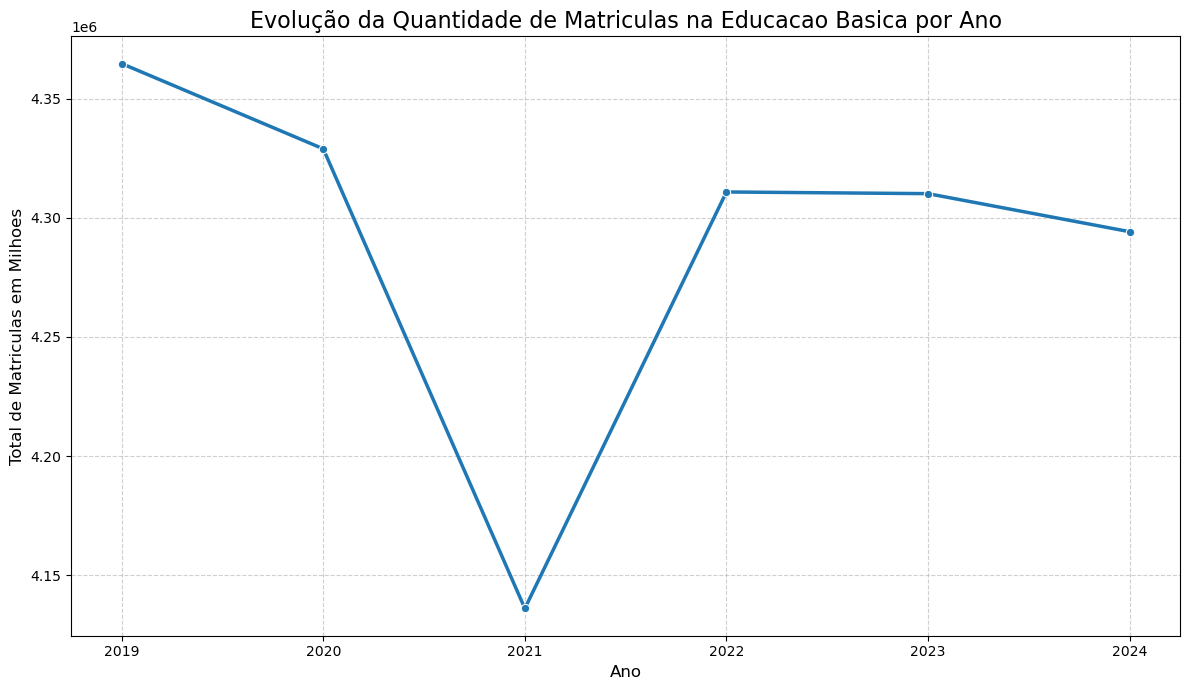

In [54]:
# Cria a tabela com a soma de registros por ano
df_educacao_mg_ano = df_educacao_mg.groupby('ano')['matriculas_basica_total'].sum().reset_index()

# Exibe a tabela com os valores totais para verficar os números
print("--- Total de Matriculas na Educacao Basica por Ano ---")
print(df_educacao_mg_ano)

# Cria o gráfico de linhas para visualizar a tendência
plt.figure(figsize = (12, 7))

sns.lineplot(data = df_educacao_mg_ano, x='ano', y='matriculas_basica_total', marker='o', linewidth=2.5)

# Adiciona títulos e rótulos
plt.title('Evolução da Quantidade de Matriculas na Educacao Basica por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Matriculas em Milhoes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Garante que todos os anos apareçam no eixo X
plt.xticks(df_educacao_mg_ano['ano'])

# Exibe o gráfico
plt.show()

**Análise da educação básica ao longo dos anos:** 
Como pode-se observar houve uma queda considerável na quantidade total de matrículas de 2020 até 2021, provavelmente motivado por questões socioeconômicas como a pandemia de covid-19, e a dificuldade de estabilização de rotina durante e após ela por conta do distanciamento social. Também observa-se uma recuperação a partir de 2022.

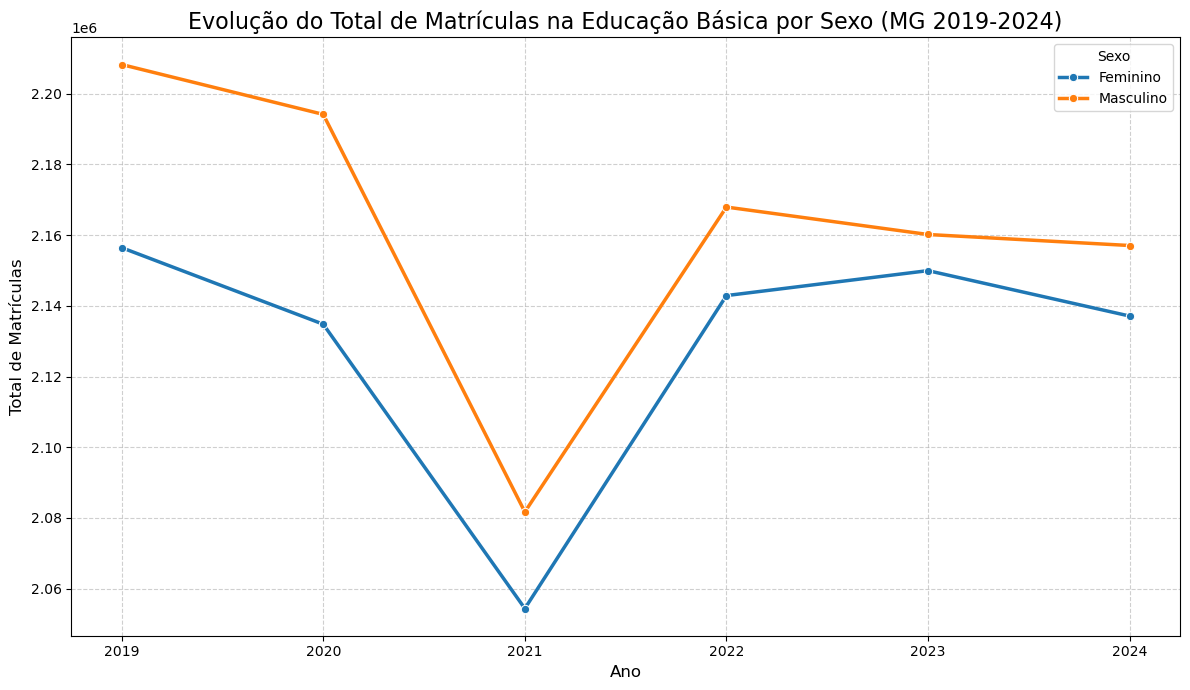


--- Tabela: Total de Matrículas por Ano e Sexo ---
     ano       Sexo  Total Matrículas
0   2019   Feminino        2156442.00
1   2020   Feminino        2134793.00
2   2021   Feminino        2054402.00
3   2022   Feminino        2142893.00
4   2023   Feminino        2149946.00
5   2024   Feminino        2137106.00
6   2019  Masculino        2208226.00
7   2020  Masculino        2194124.00
8   2021  Masculino        2081718.00
9   2022  Masculino        2167923.00
10  2023  Masculino        2160166.00
11  2024  Masculino        2157051.00


In [55]:
# Seleciona as colunas de ano e as matrículas por sexo
df_evolucao_sexo = df_educacao_mg[['ano', 'matriculas_basica_feminino', 'matriculas_basica_masculino']]

# Agrupa por 'ano' e calcula a soma para cada sexo
df_evolucao_sexo = df_evolucao_sexo.groupby('ano').sum().reset_index()

# Renomeia as colunas para clareza 
df_evolucao_sexo = df_evolucao_sexo.rename(columns={'matriculas_basica_feminino': 'Feminino', 'matriculas_basica_masculino': 'Masculino'})

# Transforma as colunas de matriculas feminino e masculino em uma única nova coluna
df_evolucao_sexo = df_evolucao_sexo.melt(id_vars = 'ano', var_name = 'Sexo', value_name = 'Total Matrículas' )

# Cria o gráfico de linhas 
plt.figure(figsize=(12, 7))
sns.lineplot(data = df_evolucao_sexo,  x = 'ano', y = 'Total Matrículas', hue = 'Sexo', marker='o', linewidth=2.5)

# Adiciona títulos e rótulos
plt.title('Evolução do Total de Matrículas na Educação Básica por Sexo (MG 2019-2024)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Matrículas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Garante que todos os anos apareçam no eixo X como inteiros
plt.xticks(df_evolucao_sexo['ano'].unique()) 

# Posiciona a legenda
plt.legend(title='Sexo')

# Ajusta o layout e exibe
plt.tight_layout()
plt.show()

# Exibe a tabela de dados 
print("\n--- Tabela: Total de Matrículas por Ano e Sexo ---")
print(df_evolucao_sexo)

**Análise da educação por sexo ao longo dos anos:** 
Pode-se observar que durante todo o período a quantidade de matrículas no ensino básico de pessoas do sexo masculino é maior que a quantidade de matrículas do sexo feminino, porém é uma diferença pequena que não ultrapassa 100 mil pessoas.\
Além disso, como observado no total de matrículas geral também houve uma queda considerável de 2020 para 2021, também motivada pela pandemia de covid-19.

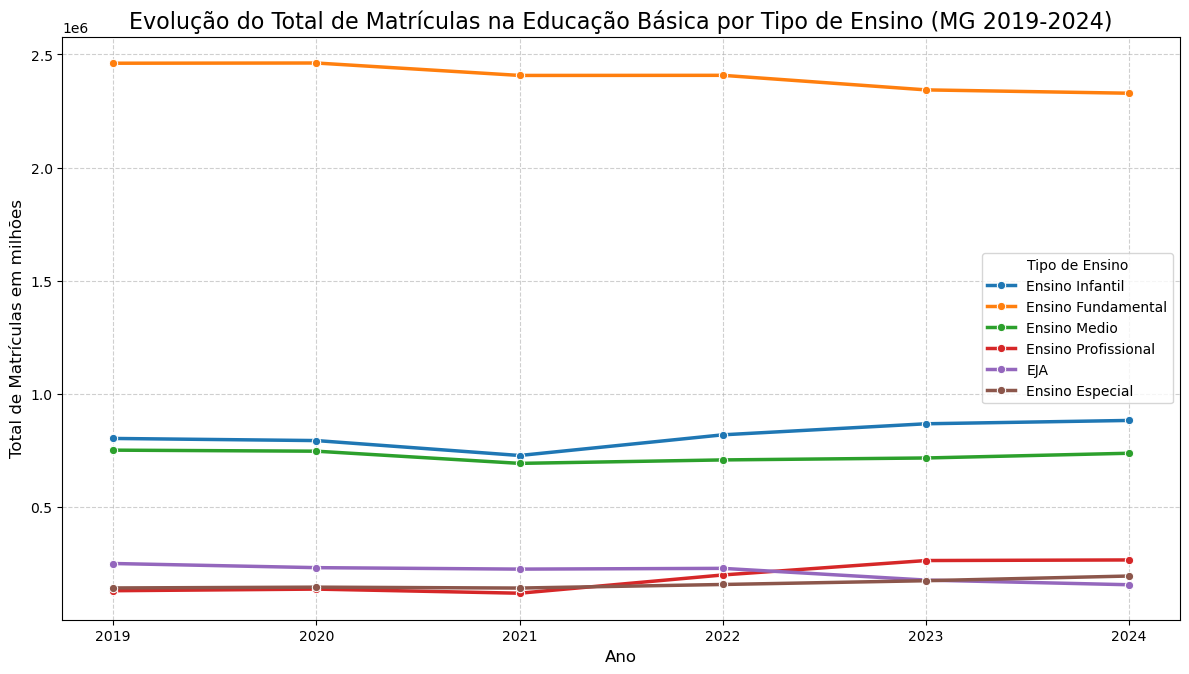


--- Tabela: Total de Matrículas por Ano e Tipo de Ensino ---
     ano          Tipo_ensino  Total Matrículas
0   2019      Ensino Infantil         802844.00
1   2020      Ensino Infantil         793422.00
2   2021      Ensino Infantil         727460.00
3   2022      Ensino Infantil         818829.00
4   2023      Ensino Infantil         867679.00
5   2024      Ensino Infantil         882436.00
6   2019   Ensino Fundamental        2461094.00
7   2020   Ensino Fundamental        2462047.00
8   2021   Ensino Fundamental        2407107.00
9   2022   Ensino Fundamental        2407621.00
10  2023   Ensino Fundamental        2343279.00
11  2024   Ensino Fundamental        2328502.00
12  2019         Ensino Medio         751103.00
13  2020         Ensino Medio         746518.00
14  2021         Ensino Medio         692668.00
15  2022         Ensino Medio         707944.00
16  2023         Ensino Medio         716517.00
17  2024         Ensino Medio         737456.00
18  2019  Ensino Profissio

In [56]:
# Seleciona as colunas de ano e as matrículas por tipo de ensino
df_evolucao_tipo_ensino = df_educacao_mg[['ano', 'matriculas_infantil', 'matriculas_fundamental', 
    'matriculas_medio', 'matriculas_profissional', 
    'matriculas_eja', 'matriculas_especial']]

# Agrupa por tipo de ensino e calcula a soma para cada tipo
df_evolucao_tipo_ensino = df_evolucao_tipo_ensino.groupby('ano').sum().reset_index()

# Renomeia as colunas para clareza 
df_evolucao_tipo_ensino = df_evolucao_tipo_ensino.rename(columns={'matriculas_infantil': 'Ensino Infantil', 'matriculas_fundamental': 'Ensino Fundamental',
                                                 'matriculas_medio': 'Ensino Medio', 'matriculas_profissional': 'Ensino Profissional',
                                                 'matriculas_eja': 'EJA', 'matriculas_especial': 'Ensino Especial'})

# Transforma as colunas de matriculas tipo de ensino em uma única nova coluna
df_evolucao_tipo_ensino = df_evolucao_tipo_ensino.melt(id_vars = 'ano', var_name = 'Tipo_ensino', value_name = 'Total Matrículas' )

# Cria o gráfico de linhas 
plt.figure(figsize=(12, 7))
sns.lineplot(data = df_evolucao_tipo_ensino,  x = 'ano', y = 'Total Matrículas', hue = 'Tipo_ensino', marker='o', linewidth=2.5)

# Adiciona títulos e rótulos
plt.title('Evolução do Total de Matrículas na Educação Básica por Tipo de Ensino (MG 2019-2024)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Matrículas em milhões', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Garante que todos os anos apareçam no eixo X como inteiros
plt.xticks(df_evolucao_tipo_ensino['ano'].unique()) 

# Posiciona a legenda
plt.legend(title='Tipo de Ensino')

# Ajusta o layout e exibe
plt.tight_layout()
plt.show()

# Exibe a tabela de dados 
print("\n--- Tabela: Total de Matrículas por Ano e Tipo de Ensino ---")
print(df_evolucao_tipo_ensino)

**Análise da educação por tipo de ensino ao longo dos anos:** 
Pode-se observar que o Ensino Fundamental domina em números absolutos, seguido por Infantil e Médio. EJA, Profissional e Especial têm bem menos matrículas. A tendência de queda 2020 para 2021 e recuperação a partir de 2022 é clara no Fundamental e Infantil. O Ensino Médio parece ter uma tendência um pouco mais estável. Já o EJA mostra uma queda mais acentuada.\
Além disso, como observado nas outras análises também houve uma queda geral considerável de 2020 para 2021 motivada pela pandemia de covid-19, com reestabilização a partir de 2022. Outra análise interessante é a queda da quantidade do EJA como mostrado, que pode indicar que pessoas adultas estão buscando cada vez menos completar o ensino básico.

### Educação Superior

In [57]:
# Carrega os arquivos csv de educação superior de 2019 ate 2024
df_educacao_superiorMG_2019 = pd.read_csv('MICRODADOS_CADASTRO_CURSOS_2019.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_superiorMG_2020 = pd.read_csv('MICRODADOS_CADASTRO_CURSOS_2020.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_superiorMG_2021 = pd.read_csv('MICRODADOS_CADASTRO_CURSOS_2021.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_superiorMG_2022 = pd.read_csv('MICRODADOS_CADASTRO_CURSOS_2022.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_superiorMG_2023 = pd.read_csv('MICRODADOS_CADASTRO_CURSOS_2023.csv', sep = ';', encoding = 'latin-1',low_memory = False)
df_educacao_superiorMG_2024 = pd.read_csv('MICRODADOS_CADASTRO_CURSOS_2024.csv', sep = ';', encoding = 'latin-1',low_memory = False)

In [58]:
# Verifica as dimensões do arquivo
df_educacao_superiorMG_2019.shape

(253139, 200)

In [59]:
# Verifica as dimensões do arquivo
df_educacao_superiorMG_2020.shape

(344691, 200)

In [60]:
# Verifica as dimensões do arquivo
df_educacao_superiorMG_2021.shape

(444786, 200)

In [61]:
# Verifica as dimensões do arquivo
df_educacao_superiorMG_2022.shape

(573019, 200)

In [62]:
# Verifica as dimensões do arquivo
df_educacao_superiorMG_2023.shape

(671610, 202)

In [63]:
# Verifica as dimensões do arquivo
df_educacao_superiorMG_2024.shape

(720349, 223)

In [64]:
# Guarda os anos da análise
anos_para_analise = [2019, 2020, 2021, 2022, 2023, 2024]

# Pega as colunas necessárias
colunas_originais = [
    'NU_ANO_CENSO', 'CO_MUNICIPIO', 'NO_UF', 'SG_UF', 'CO_UF', 'NO_MUNICIPIO', 'TP_MODALIDADE_ENSINO', 'QT_CURSO',
    'QT_VG_TOTAL', 'QT_ING', 'QT_ING_MASC', 'QT_ING_FEM', 'QT_ING_0_17', 'QT_ING_18_24','QT_ING_25_29',
    'QT_ING_30_34', 'QT_ING_35_39', 'QT_ING_40_49','QT_ING_50_59', 'QT_ING_60_MAIS', 'QT_ING_CORND',
    'QT_ING_BRANCA','QT_ING_PRETA','QT_ING_PARDA','QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_MAT', 'QT_MAT_FEM',
    'QT_MAT_MASC','QT_MAT_0_17', 'QT_MAT_18_24','QT_MAT_25_29', 'QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49',
    'QT_MAT_50_59', 'QT_MAT_60_MAIS', 'QT_MAT_CORND', 'QT_MAT_BRANCA','QT_MAT_PRETA',
    'QT_MAT_PARDA','QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_CONC', 'QT_CONC_MASC', 'QT_CONC_FEM'
]

# Lista auxiliar
lista_dfs_anuais = []

# For para criar o novo arquivo apenas com as tabelas necessárias
for ano in anos_para_analise:
    caminho_arquivo = f'MICRODADOS_CADASTRO_CURSOS_{ano}.csv'

    # Lê apenas as colunas especificadas
    df_anual = pd.read_csv(caminho_arquivo, sep = ';',encoding = 'latin-1',  low_memory = False, usecols = colunas_originais)
    # Adiciona o DataFrame filtrado à lista
    lista_dfs_anuais.append(df_anual)

df_educacao_superior = pd.concat(lista_dfs_anuais, ignore_index = True)


In [65]:
# Mostra a quantiade de linhas e colunas do dataSet
df_educacao_superior.shape

(3007594, 46)

In [66]:
# Mostra as 5 primeiras linhas do dataSet
df_educacao_superior.head()

,NU_ANO_CENSO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,TP_MODALIDADE_ENSINO,QT_CURSO,QT_VG_TOTAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND,QT_CONC,QT_CONC_FEM,QT_CONC_MASC
0,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,70.00,21.00,14.00,7.00,0.00,18.00,2.00,1.00,0.00,0.00,0.00,0.00,6.00,4.00,9.00,0.00,0.00,2.00,54.00,34.00,20.00,0.00,38.00,9.00,5.00,1.00,1.00,0.00,0.00,8.00,8.00,35.00,1.00,0.00,2.00,10.00,7.00,3.00
1,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,50.00,48.00,39.00,9.00,0.00,25.00,8.00,4.00,6.00,4.00,1.00,0.00,11.00,7.00,28.00,1.00,0.00,1.00,181.00,150.00,31.00,0.00,66.00,49.00,29.00,18.00,17.00,2.00,0.00,37.00,32.00,100.00,5.00,0.00,7.00,22.00,21.00,1.00
2,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,195.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,7.00,3.00,0.00,7.00,0.00,1.00,1.00,1.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,6.00,0.00,0.00,0.00
3,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,195.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,2.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,140.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,3.00,0.00,0.00,0.00


In [67]:
# Mostra as informações do dataSet
df_educacao_superior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007594 entries, 0 to 3007593
Data columns (total 46 columns):
 #   Column                Dtype  
---  ------                -----  
 0   NU_ANO_CENSO          int64  
 1   NO_UF                 object 
 2   SG_UF                 object 
 3   CO_UF                 float64
 4   NO_MUNICIPIO          object 
 5   CO_MUNICIPIO          float64
 6   TP_MODALIDADE_ENSINO  int64  
 7   QT_CURSO              float64
 8   QT_VG_TOTAL           float64
 9   QT_ING                float64
 10  QT_ING_FEM            float64
 11  QT_ING_MASC           float64
 12  QT_ING_0_17           float64
 13  QT_ING_18_24          float64
 14  QT_ING_25_29          float64
 15  QT_ING_30_34          float64
 16  QT_ING_35_39          float64
 17  QT_ING_40_49          float64
 18  QT_ING_50_59          float64
 19  QT_ING_60_MAIS        float64
 20  QT_ING_BRANCA         float64
 21  QT_ING_PRETA          float64
 22  QT_ING_PARDA          float64
 23  QT_ING_

In [68]:
# Renomeia as colunas para facilitar o entendimento
renomear_colunas_superior = {
    'NU_ANO_CENSO': 'ano',
    'CO_MUNICIPIO': 'cod_municipio',
    'NO_UF': 'nome_estado',
    'SG_UF': 'sigla_estado',
    'CO_UF': 'cod_estado',
    'NO_MUNICIPIO': 'nome_municipio',
    'TP_MODALIDADE_ENSINO': 'modalidade_ensino (1- presencial, 2- EAD)',
    'QT_CURSO': 'quantidade_cursos', 
    'QT_VG_TOTAL': 'vagas_total',
    'QT_ING': 'ingressantes_total',
    'QT_ING_MASC': 'ingressantes_masculino',
    'QT_ING_FEM': 'ingressantes_feminino',
    'QT_ING_0_17': 'ingressantes_superior_0_17_anos',
    'QT_ING_18_24': 'ingressantes_superior_18_24_anos',
    'QT_ING_25_29': 'ingressantes_superior_25_29_anos',
    'QT_ING_30_34': 'ingressantes_superior_30_34_anos',
    'QT_ING_35_39': 'ingressantes_superior_35_39_anos',
    'QT_ING_40_49': 'ingressantes_superior_40_49_anos',
    'QT_ING_50_59': 'ingressantes_superior_50_59_anos',
    'QT_ING_60_MAIS': 'ingressantessuperior_60_mais_anos',
    'QT_ING_CORND': 'ingressantes_superior_cor_raca_nd', 
    'QT_ING_BRANCA': 'ingressantes_superior_cor_raca_branca',
    'QT_ING_PRETA': 'ingressantes_superior_cor_raca_preta',
    'QT_ING_PARDA': 'ingressantes_superior_cor_raca_parda',
    'QT_ING_AMARELA': 'ingressantes_superior_cor_raca_amarela',
    'QT_ING_INDIGENA': 'ingressantes_superior_cor_raca_indigena',
    'QT_MAT': 'matriculas_superior_total', 
    'QT_MAT_FEM': 'matriculas_superior_feminino',
    'QT_MAT_MASC': 'matriculas_superior_masculino',
    'QT_MAT_0_17': 'matriculas_superior_0_17_anos',
    'QT_MAT_18_24': 'matriculas_superior_18_24_anos',
    'QT_MAT_25_29': 'matriculas_superior_25_29_anos',
    'QT_MAT_30_34': 'matriculas_superior_30_34_anos',
    'QT_MAT_35_39': 'matriculas_superior_35_39_anos',
    'QT_MAT_40_49': 'matriculas_superior_40_49_anos',
    'QT_MAT_50_59': 'matriculas_superior_50_59_anos',
    'QT_MAT_60_MAIS': 'matriculas_superior_60_mais_anos',
    'QT_MAT_CORND': 'matriculas_superior_cor_raca_nd', 
    'QT_MAT_BRANCA': 'matriculas_superior_cor_raca_branca',
    'QT_MAT_PRETA': 'matriculas_superior_cor_raca_preta',
    'QT_MAT_PARDA': 'matriculas_superior_cor_raca_parda',
    'QT_MAT_AMARELA': 'matriculas_superior_cor_raca_amarela',
    'QT_MAT_INDIGENA': 'matriculas_superior_cor_raca_indigena',
    'QT_CONC': 'concluintes_total',
    'QT_CONC_MASC': 'concluintes_masculino',
    'QT_CONC_FEM': 'concluintes_feminino'
}

df_educacao_superior = df_educacao_superior.rename(columns = renomear_colunas_superior)

In [69]:
# Mostra as 5 primeiras linhas do dataSet
df_educacao_superior.head()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,"modalidade_ensino (1- presencial, 2- EAD)",quantidade_cursos,vagas_total,ingressantes_total,ingressantes_feminino,ingressantes_masculino,ingressantes_superior_0_17_anos,ingressantes_superior_18_24_anos,ingressantes_superior_25_29_anos,ingressantes_superior_30_34_anos,ingressantes_superior_35_39_anos,ingressantes_superior_40_49_anos,ingressantes_superior_50_59_anos,ingressantessuperior_60_mais_anos,ingressantes_superior_cor_raca_branca,ingressantes_superior_cor_raca_preta,ingressantes_superior_cor_raca_parda,ingressantes_superior_cor_raca_amarela,ingressantes_superior_cor_raca_indigena,ingressantes_superior_cor_raca_nd,matriculas_superior_total,matriculas_superior_feminino,matriculas_superior_masculino,matriculas_superior_0_17_anos,matriculas_superior_18_24_anos,matriculas_superior_25_29_anos,matriculas_superior_30_34_anos,matriculas_superior_35_39_anos,matriculas_superior_40_49_anos,matriculas_superior_50_59_anos,matriculas_superior_60_mais_anos,matriculas_superior_cor_raca_branca,matriculas_superior_cor_raca_preta,matriculas_superior_cor_raca_parda,matriculas_superior_cor_raca_amarela,matriculas_superior_cor_raca_indigena,matriculas_superior_cor_raca_nd,concluintes_total,concluintes_feminino,concluintes_masculino
0,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,70.00,21.00,14.00,7.00,0.00,18.00,2.00,1.00,0.00,0.00,0.00,0.00,6.00,4.00,9.00,0.00,0.00,2.00,54.00,34.00,20.00,0.00,38.00,9.00,5.00,1.00,1.00,0.00,0.00,8.00,8.00,35.00,1.00,0.00,2.00,10.00,7.00,3.00
1,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,50.00,48.00,39.00,9.00,0.00,25.00,8.00,4.00,6.00,4.00,1.00,0.00,11.00,7.00,28.00,1.00,0.00,1.00,181.00,150.00,31.00,0.00,66.00,49.00,29.00,18.00,17.00,2.00,0.00,37.00,32.00,100.00,5.00,0.00,7.00,22.00,21.00,1.00
2,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,195.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,7.00,3.00,0.00,7.00,0.00,1.00,1.00,1.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,6.00,0.00,0.00,0.00
3,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,195.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,2.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2019,Rondônia,RO,11.00,Ariquemes,1100023.00,1,1.00,140.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,3.00,0.00,0.00,0.00


In [70]:
# Mostra as ultimas 5 linhas para verificar se a junção funcionou
df_educacao_superior.tail()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,"modalidade_ensino (1- presencial, 2- EAD)",quantidade_cursos,vagas_total,ingressantes_total,ingressantes_feminino,ingressantes_masculino,ingressantes_superior_0_17_anos,ingressantes_superior_18_24_anos,ingressantes_superior_25_29_anos,ingressantes_superior_30_34_anos,ingressantes_superior_35_39_anos,ingressantes_superior_40_49_anos,ingressantes_superior_50_59_anos,ingressantessuperior_60_mais_anos,ingressantes_superior_cor_raca_branca,ingressantes_superior_cor_raca_preta,ingressantes_superior_cor_raca_parda,ingressantes_superior_cor_raca_amarela,ingressantes_superior_cor_raca_indigena,ingressantes_superior_cor_raca_nd,matriculas_superior_total,matriculas_superior_feminino,matriculas_superior_masculino,matriculas_superior_0_17_anos,matriculas_superior_18_24_anos,matriculas_superior_25_29_anos,matriculas_superior_30_34_anos,matriculas_superior_35_39_anos,matriculas_superior_40_49_anos,matriculas_superior_50_59_anos,matriculas_superior_60_mais_anos,matriculas_superior_cor_raca_branca,matriculas_superior_cor_raca_preta,matriculas_superior_cor_raca_parda,matriculas_superior_cor_raca_amarela,matriculas_superior_cor_raca_indigena,matriculas_superior_cor_raca_nd,concluintes_total,concluintes_feminino,concluintes_masculino
3007589,2024,Santa Catarina,SC,42.00,Água Doce,4200408.00,2,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
3007590,2024,Santa Catarina,SC,42.00,Água Doce,4200408.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
3007591,2024,Santa Catarina,SC,42.00,Água Doce,4200408.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3007592,2024,Santa Catarina,SC,42.00,Água Doce,4200408.00,2,0.00,0.00,3.00,3.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,0.00,0.00,0.00,7.00,7.00,0.00,0.00,3.00,2.00,0.00,2.00,0.00,0.00,0.00,5.00,0.00,2.00,0.00,0.00,0.00,1.00,1.00,0.00
3007593,2024,Santa Catarina,SC,42.00,Água Doce,4200408.00,2,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [71]:
# Deixa apenas se a sigla for MG - ou seja dados da educação superior de Minas Gerais
df_educacao_superior = df_educacao_superior[df_educacao_superior['sigla_estado'] == 'MG'].copy()

In [72]:
# Mostra as 5 primeiras linhas para ver se a limitação funcionou
df_educacao_superior.head()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,"modalidade_ensino (1- presencial, 2- EAD)",quantidade_cursos,vagas_total,ingressantes_total,ingressantes_feminino,ingressantes_masculino,ingressantes_superior_0_17_anos,ingressantes_superior_18_24_anos,ingressantes_superior_25_29_anos,ingressantes_superior_30_34_anos,ingressantes_superior_35_39_anos,ingressantes_superior_40_49_anos,ingressantes_superior_50_59_anos,ingressantessuperior_60_mais_anos,ingressantes_superior_cor_raca_branca,ingressantes_superior_cor_raca_preta,ingressantes_superior_cor_raca_parda,ingressantes_superior_cor_raca_amarela,ingressantes_superior_cor_raca_indigena,ingressantes_superior_cor_raca_nd,matriculas_superior_total,matriculas_superior_feminino,matriculas_superior_masculino,matriculas_superior_0_17_anos,matriculas_superior_18_24_anos,matriculas_superior_25_29_anos,matriculas_superior_30_34_anos,matriculas_superior_35_39_anos,matriculas_superior_40_49_anos,matriculas_superior_50_59_anos,matriculas_superior_60_mais_anos,matriculas_superior_cor_raca_branca,matriculas_superior_cor_raca_preta,matriculas_superior_cor_raca_parda,matriculas_superior_cor_raca_amarela,matriculas_superior_cor_raca_indigena,matriculas_superior_cor_raca_nd,concluintes_total,concluintes_feminino,concluintes_masculino
10416,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,1,1.00,46.00,43.00,27.00,16.00,0.00,24.00,10.00,4.00,5.00,0.00,0.00,0.00,7.00,0.00,5.00,1.00,0.00,30.00,116.00,72.00,44.00,0.00,61.00,27.00,14.00,11.00,3.00,0.00,0.00,10.00,2.00,22.00,1.00,0.00,81.00,12.00,7.00,5.00
10417,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,1,1.00,51.00,33.00,19.00,14.00,0.00,22.00,4.00,3.00,3.00,1.00,0.00,0.00,4.00,1.00,4.00,0.00,0.00,24.00,113.00,69.00,44.00,0.00,66.00,25.00,7.00,11.00,3.00,1.00,0.00,9.00,1.00,23.00,1.00,0.00,79.00,23.00,12.00,11.00
10418,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,1,1.00,39.00,26.00,22.00,4.00,0.00,14.00,6.00,2.00,2.00,1.00,1.00,0.00,1.00,1.00,4.00,0.00,0.00,20.00,76.00,64.00,12.00,0.00,30.00,20.00,7.00,7.00,9.00,1.00,2.00,2.00,1.00,9.00,0.00,0.00,64.00,10.00,9.00,1.00
10419,2019,Minas Gerais,MG,31.00,Aimorés,3101102.00,1,1.00,101.00,23.00,14.00,9.00,0.00,20.00,3.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,2.00,0.00,0.00,17.00,49.00,27.00,22.00,0.00,38.00,6.00,3.00,1.00,1.00,0.00,0.00,6.00,0.00,5.00,0.00,0.00,38.00,15.00,7.00,8.00
10420,2019,Minas Gerais,MG,31.00,Aimorés,3101102.00,1,1.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00,11.00,5.00,0.00,10.00,4.00,2.00,0.00,0.00,0.00,0.00,5.00,0.00,3.00,0.00,0.00,8.00,9.00,5.00,4.00


In [73]:
# Mostra as 5 últimas linhas para ver se a limitação funcionou
df_educacao_superior.tail()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,"modalidade_ensino (1- presencial, 2- EAD)",quantidade_cursos,vagas_total,ingressantes_total,ingressantes_feminino,ingressantes_masculino,ingressantes_superior_0_17_anos,ingressantes_superior_18_24_anos,ingressantes_superior_25_29_anos,ingressantes_superior_30_34_anos,ingressantes_superior_35_39_anos,ingressantes_superior_40_49_anos,ingressantes_superior_50_59_anos,ingressantessuperior_60_mais_anos,ingressantes_superior_cor_raca_branca,ingressantes_superior_cor_raca_preta,ingressantes_superior_cor_raca_parda,ingressantes_superior_cor_raca_amarela,ingressantes_superior_cor_raca_indigena,ingressantes_superior_cor_raca_nd,matriculas_superior_total,matriculas_superior_feminino,matriculas_superior_masculino,matriculas_superior_0_17_anos,matriculas_superior_18_24_anos,matriculas_superior_25_29_anos,matriculas_superior_30_34_anos,matriculas_superior_35_39_anos,matriculas_superior_40_49_anos,matriculas_superior_50_59_anos,matriculas_superior_60_mais_anos,matriculas_superior_cor_raca_branca,matriculas_superior_cor_raca_preta,matriculas_superior_cor_raca_parda,matriculas_superior_cor_raca_amarela,matriculas_superior_cor_raca_indigena,matriculas_superior_cor_raca_nd,concluintes_total,concluintes_feminino,concluintes_masculino
2654319,2024,Minas Gerais,MG,31.00,Águas Vermelhas,3101003.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2654320,2024,Minas Gerais,MG,31.00,Águas Vermelhas,3101003.00,2,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,2.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2654321,2024,Minas Gerais,MG,31.00,Águas Vermelhas,3101003.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2654322,2024,Minas Gerais,MG,31.00,Águas Vermelhas,3101003.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2654323,2024,Minas Gerais,MG,31.00,Águas Vermelhas,3101003.00,2,0.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,7.00,7.00,0.00,0.00,2.00,0.00,0.00,2.00,3.00,0.00,0.00,4.00,0.00,3.00,0.00,0.00,0.00,2.00,2.00,0.00


In [74]:
# Confere as dimensões do banco
df_educacao_superior.shape

(337847, 46)

In [75]:
# Cofere as informações do banco
df_educacao_superior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337847 entries, 10416 to 2654323
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   ano                                        337847 non-null  int64  
 1   nome_estado                                337847 non-null  object 
 2   sigla_estado                               337847 non-null  object 
 3   cod_estado                                 337847 non-null  float64
 4   nome_municipio                             337847 non-null  object 
 5   cod_municipio                              337847 non-null  float64
 6   modalidade_ensino (1- presencial, 2- EAD)  337847 non-null  int64  
 7   quantidade_cursos                          311734 non-null  float64
 8   vagas_total                                311734 non-null  float64
 9   ingressantes_total                         337847 non-null  float64
 10  ingressa

In [76]:
# Analisa os valores nulos
df_educacao_superior.isnull().sum()

ano                                              0
nome_estado                                      0
sigla_estado                                     0
cod_estado                                       0
nome_municipio                                   0
cod_municipio                                    0
modalidade_ensino (1- presencial, 2- EAD)        0
quantidade_cursos                            26113
vagas_total                                  26113
ingressantes_total                               0
ingressantes_feminino                            0
ingressantes_masculino                           0
ingressantes_superior_0_17_anos                  0
ingressantes_superior_18_24_anos                 0
ingressantes_superior_25_29_anos                 0
ingressantes_superior_30_34_anos                 0
ingressantes_superior_35_39_anos                 0
ingressantes_superior_40_49_anos                 0
ingressantes_superior_50_59_anos                 0
ingressantessuperior_60_mais_an

In [77]:
# Faz a contagem de nulos por coluna
null_counts = df_educacao_superior.isnull().sum()

# Pega a lista de nomes das colunas que tem nulos
nomes_colunas_com_nulos = null_counts[null_counts > 0].index.tolist()

# Pega o nome da primeira coluna da lista
primeira_coluna_com_nulos = nomes_colunas_com_nulos[0] 

# Filtra o DataFrame original para pegar as linhas com nulos nessa coluna
df_linhas_nulas = df_educacao_superior.loc[df_educacao_superior[primeira_coluna_com_nulos].isnull()]
    
# Imprime as 5 primeiras linhas encontradas
df_linhas_nulas.head(5)

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,"modalidade_ensino (1- presencial, 2- EAD)",quantidade_cursos,vagas_total,ingressantes_total,ingressantes_feminino,ingressantes_masculino,ingressantes_superior_0_17_anos,ingressantes_superior_18_24_anos,ingressantes_superior_25_29_anos,ingressantes_superior_30_34_anos,ingressantes_superior_35_39_anos,ingressantes_superior_40_49_anos,ingressantes_superior_50_59_anos,ingressantessuperior_60_mais_anos,ingressantes_superior_cor_raca_branca,ingressantes_superior_cor_raca_preta,ingressantes_superior_cor_raca_parda,ingressantes_superior_cor_raca_amarela,ingressantes_superior_cor_raca_indigena,ingressantes_superior_cor_raca_nd,matriculas_superior_total,matriculas_superior_feminino,matriculas_superior_masculino,matriculas_superior_0_17_anos,matriculas_superior_18_24_anos,matriculas_superior_25_29_anos,matriculas_superior_30_34_anos,matriculas_superior_35_39_anos,matriculas_superior_40_49_anos,matriculas_superior_50_59_anos,matriculas_superior_60_mais_anos,matriculas_superior_cor_raca_branca,matriculas_superior_cor_raca_preta,matriculas_superior_cor_raca_parda,matriculas_superior_cor_raca_amarela,matriculas_superior_cor_raca_indigena,matriculas_superior_cor_raca_nd,concluintes_total,concluintes_feminino,concluintes_masculino
92051,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,2,NaN,NaN,6.00,3.00,3.00,0.00,2.00,1.00,1.00,0.00,2.00,0.00,0.00,4.00,0.00,2.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
92052,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,2,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
92053,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,2,NaN,NaN,2.00,1.00,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,4.00,4.00,0.00,0.00,2.00,1.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
92054,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,2,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
92055,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,2,NaN,NaN,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Como podemos observar existem valores nulos em quantidade de cursos e vagas total em algumas colunas, o que provavelmente indica que os dados dessas cidades não foram reportados ou não se aplicam. Porém como nas outras colunas existem valores de matrículsa importantes para análise, não se deve excluir essas linhas, portanto a melhor coisa a ser fazer para remover esses valores nulos e substítui-los por 0.

In [78]:
#Pega as colunas que tem valores nulos
colunas_para_preencher_com_zero = [
    'quantidade_cursos', 
    'vagas_total'
]

# Preenche os NaNs com 0 apenas nessas colunas específicas
df_educacao_superior[colunas_para_preencher_com_zero] = df_educacao_superior[colunas_para_preencher_com_zero].fillna(0)

In [79]:
# Confere para ver se ta tudo certo
df_educacao_superior.head()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,"modalidade_ensino (1- presencial, 2- EAD)",quantidade_cursos,vagas_total,ingressantes_total,ingressantes_feminino,ingressantes_masculino,ingressantes_superior_0_17_anos,ingressantes_superior_18_24_anos,ingressantes_superior_25_29_anos,ingressantes_superior_30_34_anos,ingressantes_superior_35_39_anos,ingressantes_superior_40_49_anos,ingressantes_superior_50_59_anos,ingressantessuperior_60_mais_anos,ingressantes_superior_cor_raca_branca,ingressantes_superior_cor_raca_preta,ingressantes_superior_cor_raca_parda,ingressantes_superior_cor_raca_amarela,ingressantes_superior_cor_raca_indigena,ingressantes_superior_cor_raca_nd,matriculas_superior_total,matriculas_superior_feminino,matriculas_superior_masculino,matriculas_superior_0_17_anos,matriculas_superior_18_24_anos,matriculas_superior_25_29_anos,matriculas_superior_30_34_anos,matriculas_superior_35_39_anos,matriculas_superior_40_49_anos,matriculas_superior_50_59_anos,matriculas_superior_60_mais_anos,matriculas_superior_cor_raca_branca,matriculas_superior_cor_raca_preta,matriculas_superior_cor_raca_parda,matriculas_superior_cor_raca_amarela,matriculas_superior_cor_raca_indigena,matriculas_superior_cor_raca_nd,concluintes_total,concluintes_feminino,concluintes_masculino
10416,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,1,1.00,46.00,43.00,27.00,16.00,0.00,24.00,10.00,4.00,5.00,0.00,0.00,0.00,7.00,0.00,5.00,1.00,0.00,30.00,116.00,72.00,44.00,0.00,61.00,27.00,14.00,11.00,3.00,0.00,0.00,10.00,2.00,22.00,1.00,0.00,81.00,12.00,7.00,5.00
10417,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,1,1.00,51.00,33.00,19.00,14.00,0.00,22.00,4.00,3.00,3.00,1.00,0.00,0.00,4.00,1.00,4.00,0.00,0.00,24.00,113.00,69.00,44.00,0.00,66.00,25.00,7.00,11.00,3.00,1.00,0.00,9.00,1.00,23.00,1.00,0.00,79.00,23.00,12.00,11.00
10418,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,1,1.00,39.00,26.00,22.00,4.00,0.00,14.00,6.00,2.00,2.00,1.00,1.00,0.00,1.00,1.00,4.00,0.00,0.00,20.00,76.00,64.00,12.00,0.00,30.00,20.00,7.00,7.00,9.00,1.00,2.00,2.00,1.00,9.00,0.00,0.00,64.00,10.00,9.00,1.00
10419,2019,Minas Gerais,MG,31.00,Aimorés,3101102.00,1,1.00,101.00,23.00,14.00,9.00,0.00,20.00,3.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,2.00,0.00,0.00,17.00,49.00,27.00,22.00,0.00,38.00,6.00,3.00,1.00,1.00,0.00,0.00,6.00,0.00,5.00,0.00,0.00,38.00,15.00,7.00,8.00
10420,2019,Minas Gerais,MG,31.00,Aimorés,3101102.00,1,1.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00,11.00,5.00,0.00,10.00,4.00,2.00,0.00,0.00,0.00,0.00,5.00,0.00,3.00,0.00,0.00,8.00,9.00,5.00,4.00


In [80]:
# Confere se não existem mais valores nulos
df_educacao_superior.isnull().sum()

ano                                          0
nome_estado                                  0
sigla_estado                                 0
cod_estado                                   0
nome_municipio                               0
cod_municipio                                0
modalidade_ensino (1- presencial, 2- EAD)    0
quantidade_cursos                            0
vagas_total                                  0
ingressantes_total                           0
ingressantes_feminino                        0
ingressantes_masculino                       0
ingressantes_superior_0_17_anos              0
ingressantes_superior_18_24_anos             0
ingressantes_superior_25_29_anos             0
ingressantes_superior_30_34_anos             0
ingressantes_superior_35_39_anos             0
ingressantes_superior_40_49_anos             0
ingressantes_superior_50_59_anos             0
ingressantessuperior_60_mais_anos            0
ingressantes_superior_cor_raca_branca        0
ingressantes_

--- Total de Cursos Superiores por Ano ---
    ano  quantidade_cursos
0  2019            3612.00
1  2020            3661.00
2  2021            3665.00
3  2022            3710.00
4  2023            3695.00
5  2024            3589.00


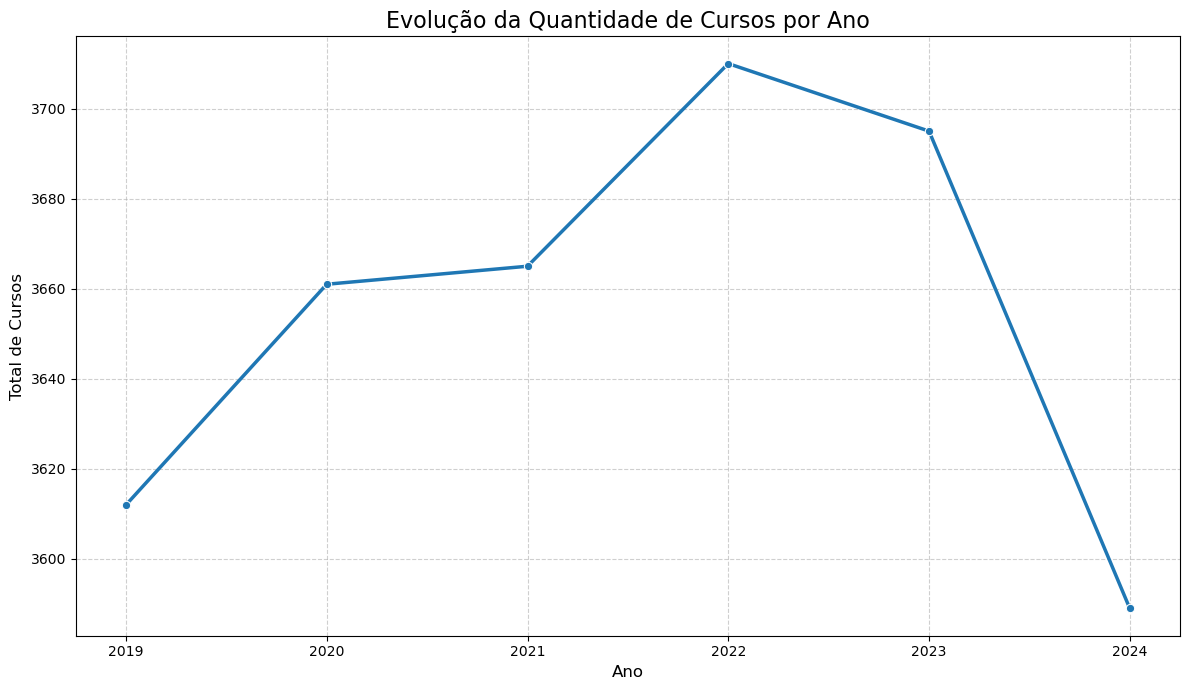

In [81]:
# Cria a tabela com a soma de registros por ano
df_educacao_superior_ano = df_educacao_superior.groupby('ano')['quantidade_cursos'].sum().reset_index()

# Exibe a tabela com os valores totais para verficar os números
print("--- Total de Cursos Superiores por Ano ---")
print(df_educacao_superior_ano)

# Cria o gráfico de linhas para visualizar a tendência
plt.figure(figsize = (12, 7))
sns.lineplot(data = df_educacao_superior_ano, x = 'ano', y = 'quantidade_cursos', marker = 'o', linewidth=2.5)

# Adiciona títulos e rótulos
plt.title('Evolução da Quantidade de Cursos por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Cursos', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.6)

# Garante que todos os anos apareçam no eixo X
plt.xticks(df_educacao_superior_ano['ano'])

# Exibe o gráfico
plt.show()

--- Total de Cursos Superiores por Ano ---
    ano  vagas_total
0  2019    499025.00
1  2020    463209.00
2  2021    437637.00
3  2022    451360.00
4  2023    419668.00
5  2024    428219.00


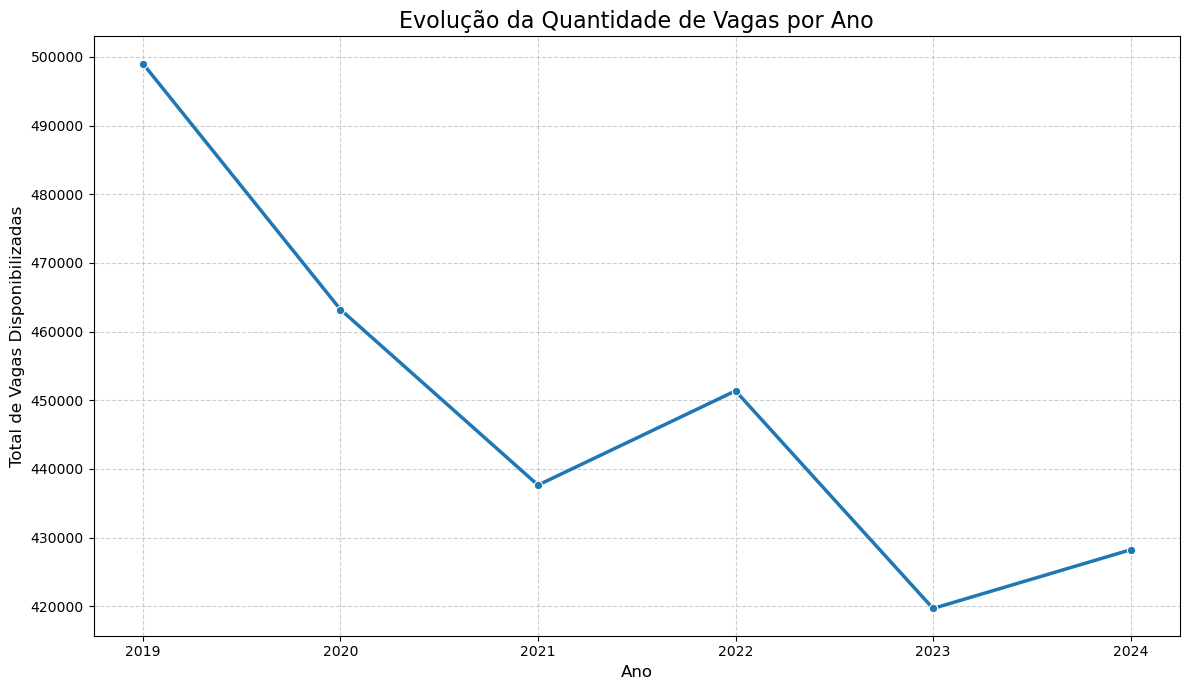

In [82]:
# Cria a tabela com a soma de registros por ano
df_educacao_superior_ano = df_educacao_superior.groupby('ano')['vagas_total'].sum().reset_index()

# Exibe a tabela com os valores totais para verficar os números
print("--- Total de Cursos Superiores por Ano ---")
print(df_educacao_superior_ano)

# Cria o gráfico de linhas para visualizar a tendência
plt.figure(figsize = (12, 7))
sns.lineplot(data = df_educacao_superior_ano, x = 'ano', y = 'vagas_total', marker = 'o', linewidth=2.5)

# Adiciona títulos e rótulos
plt.title('Evolução da Quantidade de Vagas por Ano', fontsize=16)
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Total de Vagas Disponibilizadas', fontsize=12)
plt.grid(True, linestyle = '--', alpha = 0.6)

# Garante que todos os anos apareçam no eixo X
plt.xticks(df_educacao_superior_ano['ano'])

# Exibe o gráfico
plt.show()

--- Total de Cursos Superiores por Ano ---
    ano  ingressantes_total
0  2019           334235.00
1  2020           339422.00
2  2021           356283.00
3  2022           432698.00
4  2023           456081.00
5  2024           445445.00


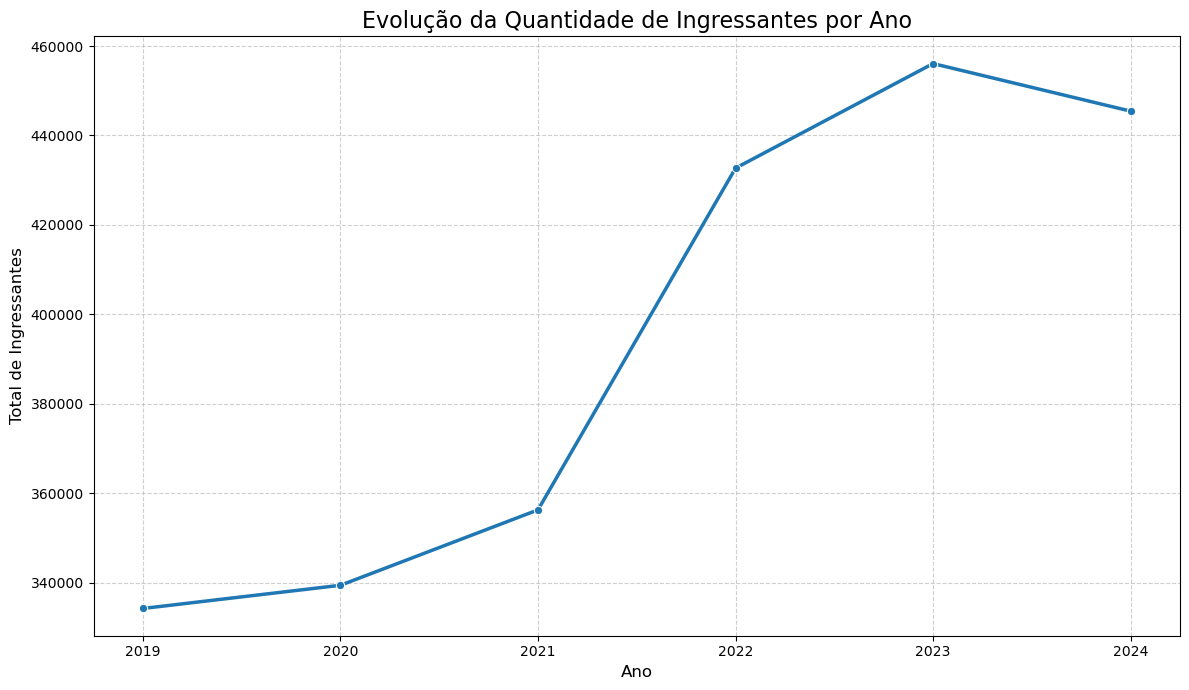

In [83]:
# Cria a tabela com a soma de registros por ano
df_educacao_superior_ano = df_educacao_superior.groupby('ano')['ingressantes_total'].sum().reset_index()

# Exibe a tabela com os valores totais para verficar os números
print("--- Total de Cursos Superiores por Ano ---")
print(df_educacao_superior_ano)

# Cria o gráfico de linhas para visualizar a tendência
plt.figure(figsize = (12, 7))
sns.lineplot(data = df_educacao_superior_ano, x = 'ano', y = 'ingressantes_total', marker = 'o', linewidth=2.5)

# Adiciona títulos e rótulos
plt.title('Evolução da Quantidade de Ingressantes por Ano', fontsize=16)
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Total de Ingressantes', fontsize=12)
plt.grid(True, linestyle = '--', alpha = 0.6)

# Garante que todos os anos apareçam no eixo X
plt.xticks(df_educacao_superior_ano['ano'])

# Exibe o gráfico
plt.show()

**Análise desses gráficos:**
A primeira coisa possível de observar é que a quantidade de cursos apesar de ter crescido entre 2019 e 2022 onde teve sua alta, começou a cair novamente. Porém quando se observa a quantidade de vagas disponíveis percebe-se que e está em constante queda, possivelmente influenciada pela pandemia de Covid-19, mesmo que em 2022 tenha crescido um pouco batendo com o crescimento da quantidade de cursos, permaneceu em um valor baixo.\
    Apesar desses fatores obrserva-se que há um constante aumento na quantidade de ingressantes com uma pequena queda em 2024, porém ainda sim, números bem superiores aos anos anteriores. Isso quer dizer que mais pessoas estão buscando o ensino superior, provavelmente possibilitado pela criação de muitos cursos de ensino a distância que facilitam o ingresso de muitas pessoas.\
\
Para comprovar essa hipótese vamos análisar por modalidade de ensino.

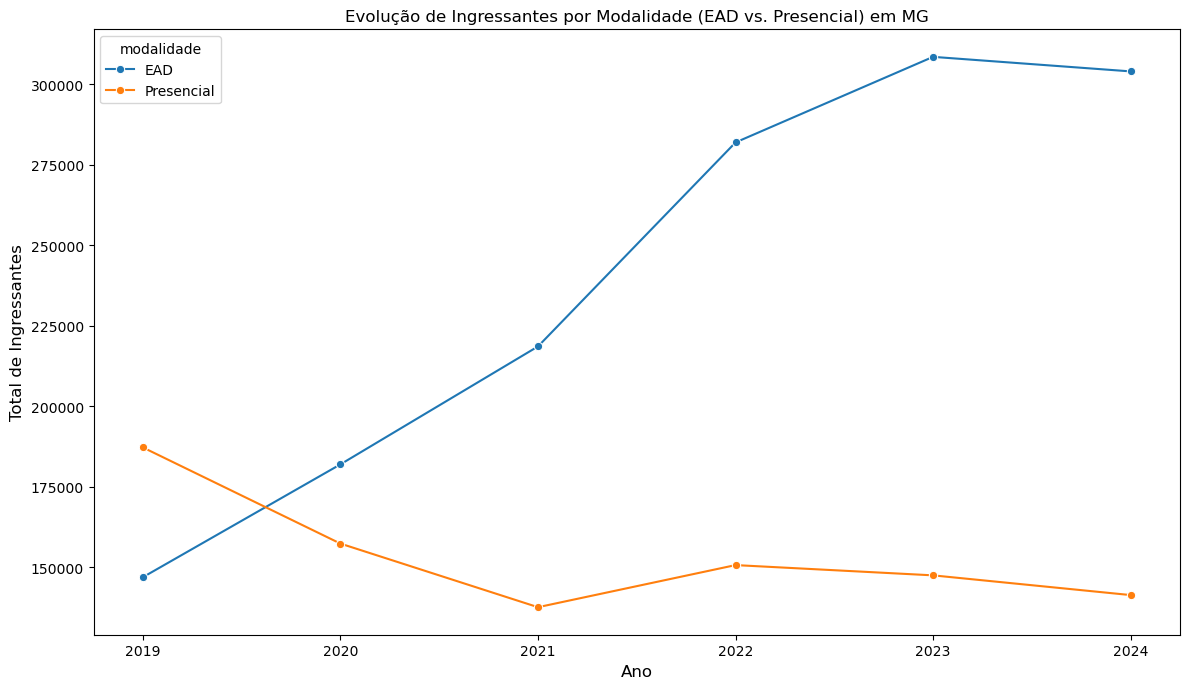

In [84]:
# Separa as modalidades de ensino
mapeamento_modalidade = {1: 'Presencial', 2: 'EAD'}
df_educacao_superior['modalidade'] = df_educacao_superior['modalidade_ensino (1- presencial, 2- EAD)'].map(mapeamento_modalidade)

# Agrega por ano e por modalidade
df_evo_modalidade = df_educacao_superior.groupby(['ano', 'modalidade'])['ingressantes_total'].sum().reset_index()

# Mostra a evolução
plt.figure(figsize = (12, 7))
sns.lineplot(data = df_evo_modalidade, x = 'ano', y = 'ingressantes_total', hue = 'modalidade', marker = 'o')
plt.title('Evolução de Ingressantes por Modalidade (EAD vs. Presencial) em MG')
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Total de Ingressantes', fontsize=12)
plt.show()

**Conclusão:**
Como podemos observar a hipótese estava correta. Desde 2020 a quantdade de ingressantes em cursos EAD subiu absurdamente, muito influenciado pela pandemia de covid-19 na qual não se podia sair de casa.\
Isso mostra uma mudança estrutural gigantesca no acesso ao ensino superior em Minas Gerais. O EAD, por ser mais acessível, flexível e (geralmente) mais barato, está permitindo que um número maior de pessoas ingresse na faculdade, mesmo com o encolhimento do modelo presencial tradicional pós-pandemia. \
\
Agora devemos analisar um pouco mais profundamente!

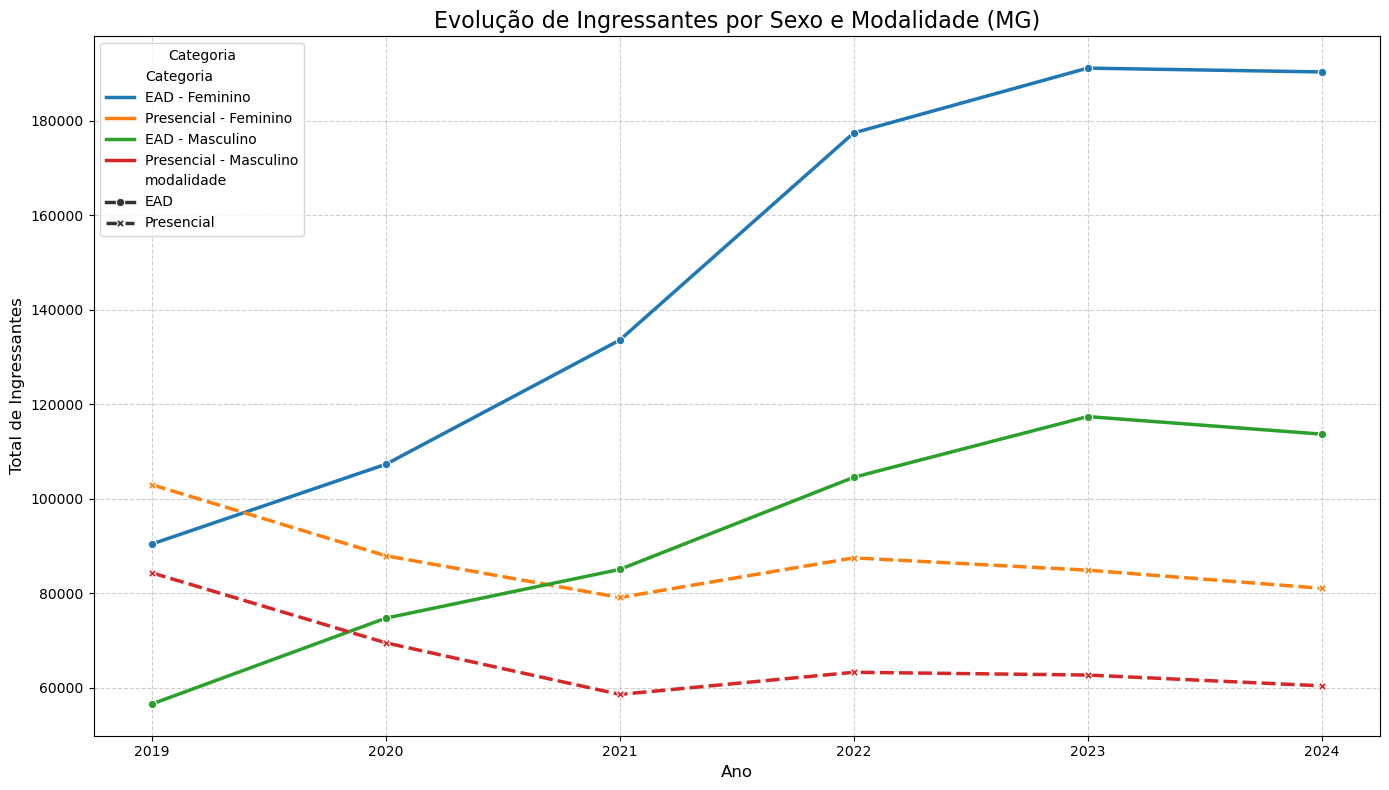

Sexo             Feminino  Masculino
ano  modalidade                     
2019 EAD         90421.00   56557.00
     Presencial 102957.00   84300.00
2020 EAD        107293.00   74724.00
     Presencial  87915.00   69490.00
2021 EAD        133586.00   85038.00
     Presencial  79089.00   58570.00
2022 EAD        177432.00  104532.00
     Presencial  87476.00   63258.00
2023 EAD        191149.00  117386.00
     Presencial  84874.00   62672.00
2024 EAD        190344.00  113676.00
     Presencial  81036.00   60389.00

In [85]:
# Seta as modalidades
mapeamento_modalidade = {1: 'Presencial', 2: 'EAD'}
df_educacao_superior['modalidade'] = df_educacao_superior['modalidade_ensino (1- presencial, 2- EAD)'].map(mapeamento_modalidade)

# Agrupa por ano e modalidade, somando por sexo 
df_por_sexo = df_educacao_superior.groupby(['ano', 'modalidade'])[['ingressantes_feminino', 'ingressantes_masculino']].sum().reset_index()

# Renomeia as colunas para maior clareza 
df_por_sexo = df_por_sexo.rename(columns={
    'ingressantes_feminino': 'Feminino',
    'ingressantes_masculino': 'Masculino'
})

# Transforma as colunas de ingressantes feminino e masculino em uma única nova coluna
df_por_sexo = df_por_sexo.melt(id_vars = ['ano', 'modalidade'], var_name = 'Sexo', value_name = 'Total Ingressantes')

# Cria a coluna de Categoria combinada 
df_por_sexo['Categoria'] = df_por_sexo['modalidade'] + ' - ' + df_por_sexo['Sexo']

# Cria o gráfico de linhas
plt.figure(figsize = (14, 8))
sns.lineplot(data = df_por_sexo, x = 'ano', y = 'Total Ingressantes', hue = 'Categoria', style = 'modalidade', markers = True, linewidth = 2.5)

# Adiciona títulos e rótulos
plt.title('Evolução de Ingressantes por Sexo e Modalidade (MG)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Ingressantes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Garante que todos os anos apareçam no eixo X como inteiros
plt.xticks(df_por_sexo['ano'].unique())

# Posiciona a legenda
plt.legend(title = 'Categoria')

# Ajusta o layout e exibe
plt.tight_layout()
plt.show()

df_por_sexo.pivot_table(index=['ano', 'modalidade'], columns='Sexo', values='Total Ingressantes')

**Análise:**
Podemos observar que a quantidade total de ingressantes em todos os anos é maior de mulheres do que de homens, isso indica que as mulheres buscam mais o ensino superior que os homens.\
Além disso também percebemos que, como era esperado, em ambos os sexos o houve um grande aumento na quantidade de ingressantes no ensino EAD, porém quem mais se beneficiou foram as pessoas do sexo feminino que houve um aumento ainda mais expressivo.\
Portanto podemos concluir que o ensino EAD está permitindo que cada vez mais pessoas que as vezes precisam trabalhar ou conciliar família tenham acesso ao ensino superior.

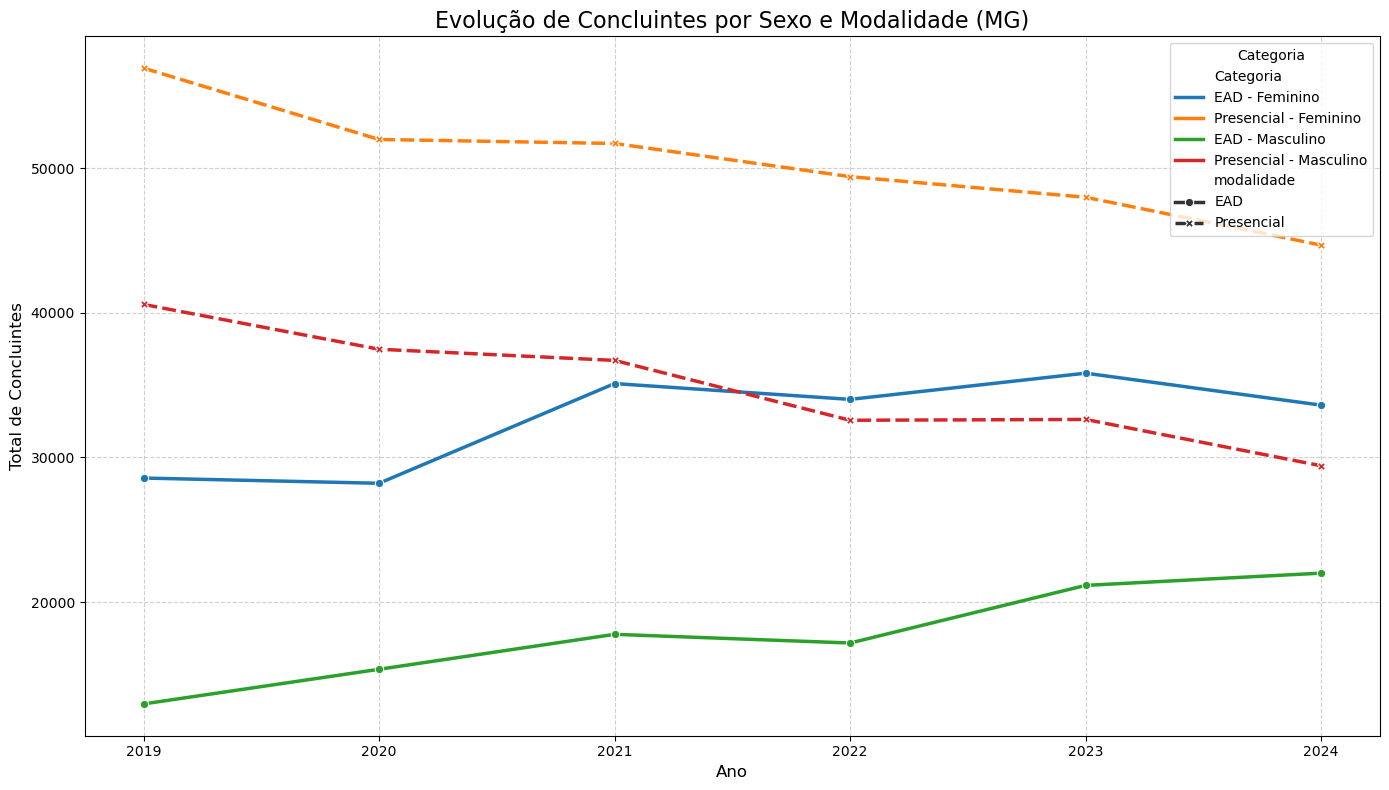

Sexo             Feminino  Masculino
ano  modalidade                     
2019 EAD         28574.00   12954.00
     Presencial  56921.00   40582.00
2020 EAD         28213.00   15350.00
     Presencial  51988.00   37482.00
2021 EAD         35108.00   17767.00
     Presencial  51711.00   36710.00
2022 EAD         34014.00   17167.00
     Presencial  49417.00   32570.00
2023 EAD         35827.00   21151.00
     Presencial  47990.00   32628.00
2024 EAD         33615.00   21998.00
     Presencial  44682.00   29424.00

In [86]:
# Seta as modalidades
mapeamento_modalidade = {1: 'Presencial', 2: 'EAD'}
df_educacao_superior['modalidade'] = df_educacao_superior['modalidade_ensino (1- presencial, 2- EAD)'].map(mapeamento_modalidade)

# Agrupa por ano e modalidade, somando por sexo 
df_concluintes_por_sexo = df_educacao_superior.groupby(['ano', 'modalidade'])[['concluintes_feminino', 'concluintes_masculino']].sum().reset_index()

# Renomeia as colunas para maior clareza 
df_concluintes_por_sexo = df_concluintes_por_sexo.rename(columns={
    'concluintes_feminino': 'Feminino',
    'concluintes_masculino': 'Masculino'
})

# Transforma as colunas de matriculas feminino e masculino em uma única nova coluna
df_concluintes_por_sexo = df_concluintes_por_sexo.melt(id_vars = ['ano', 'modalidade'], var_name = 'Sexo', value_name = 'Total Concluintes')

# Cria a coluna de Categoria combinada 
df_concluintes_por_sexo['Categoria'] = df_concluintes_por_sexo['modalidade'] + ' - ' + df_concluintes_por_sexo['Sexo']

# Cria o gráfico de linhas
plt.figure(figsize = (14, 8))
sns.lineplot(data = df_concluintes_por_sexo, x = 'ano', y = 'Total Concluintes', hue = 'Categoria', style = 'modalidade', markers = True, linewidth = 2.5)

# Adiciona títulos e rótulos
plt.title('Evolução de Concluintes por Sexo e Modalidade (MG)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Concluintes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Garante que todos os anos apareçam no eixo X como inteiros
plt.xticks(df_concluintes_por_sexo['ano'].unique())

# Posiciona a legenda
plt.legend(title = 'Categoria')

# Ajusta o layout e exibe
plt.tight_layout()
plt.show()

df_concluintes_por_sexo.pivot_table(index=['ano', 'modalidade'], columns='Sexo', values='Total Concluintes')

**Análise:**
Como podemos observar existe uma baixa na quantidade de concluintes de cursos presenciais e uma alta nos concluintes de cursos EAD, porém ainda não é tão expressivo, a têndencia é que com a quantidade de ingressantes nos cursos EAD aumentando e de cursos presenciais diminuindo ao longo dos anos a diferença de concluintes em cada modalidade será cada vez maior, com os concluintes de EAD superando os concluintes em presencial em ambos os sexos.\
Contudo, essa diferença ja deve ser visível na quantidade total de matrículados.

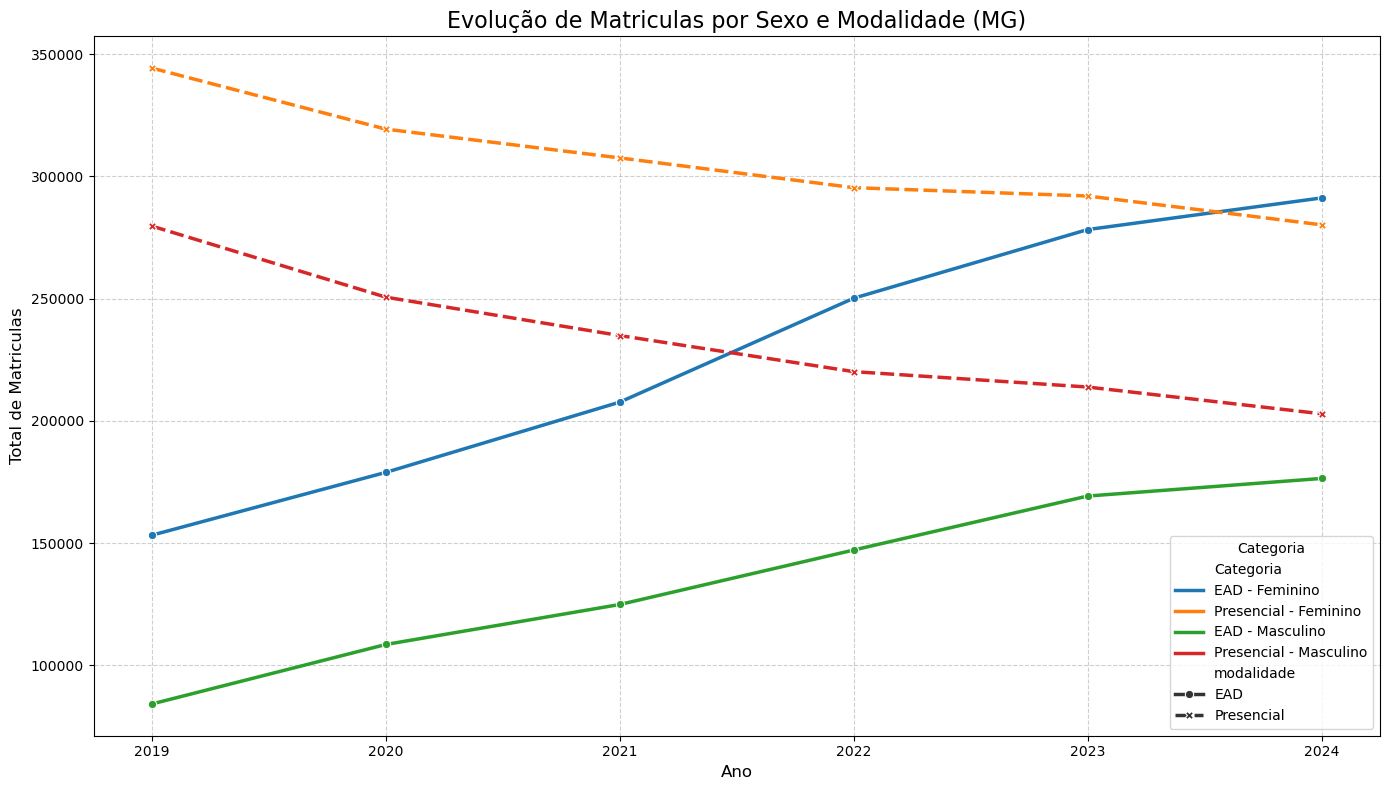

Sexo             Feminino  Masculino
ano  modalidade                     
2019 EAD        153259.00   84219.00
     Presencial 344301.00  279665.00
2020 EAD        178948.00  108545.00
     Presencial 319346.00  250605.00
2021 EAD        207689.00  124899.00
     Presencial 307570.00  234905.00
2022 EAD        250172.00  147177.00
     Presencial 295403.00  220148.00
2023 EAD        278260.00  169250.00
     Presencial 291995.00  213853.00
2024 EAD        291200.00  176454.00
     Presencial 280202.00  202905.00

In [87]:
# Seta as modalidades
mapeamento_modalidade = {1: 'Presencial', 2: 'EAD'}
df_educacao_superior['modalidade'] = df_educacao_superior['modalidade_ensino (1- presencial, 2- EAD)'].map(mapeamento_modalidade)

# Agrupa por ano e modalidade, somando por sexo 
df_matriculas_por_sexo = df_educacao_superior.groupby(['ano', 'modalidade'])[['matriculas_superior_feminino', 'matriculas_superior_masculino']].sum().reset_index()

# Renomeia as colunas para maior clareza 
df_matriculas_por_sexo = df_matriculas_por_sexo.rename(columns={
    'matriculas_superior_feminino': 'Feminino',
    'matriculas_superior_masculino': 'Masculino'
})

# Transforma as colunas de matriculas feminino e masculino em uma única nova coluna
df_matriculas_por_sexo = df_matriculas_por_sexo.melt(id_vars = ['ano', 'modalidade'], var_name = 'Sexo', value_name = 'Total Matriculas')

# Cria a coluna de Categoria combinada 
df_matriculas_por_sexo['Categoria'] = df_matriculas_por_sexo['modalidade'] + ' - ' + df_matriculas_por_sexo['Sexo']

# Cria o gráfico de linhas
plt.figure(figsize = (14, 8))
sns.lineplot(data = df_matriculas_por_sexo, x = 'ano', y = 'Total Matriculas', hue = 'Categoria', style = 'modalidade', markers = True, linewidth = 2.5)

# Adiciona títulos e rótulos
plt.title('Evolução de Matriculas por Sexo e Modalidade (MG)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Matriculas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Garante que todos os anos apareçam no eixo X como inteiros
plt.xticks(df_matriculas_por_sexo['ano'].unique())

# Posiciona a legenda
plt.legend(title = 'Categoria')

# Ajusta o layout e exibe
plt.tight_layout()
plt.show()

df_matriculas_por_sexo.pivot_table(index=['ano', 'modalidade'], columns='Sexo', values='Total Matriculas')

**Análise:**
Como era esperado, podemos ver que a quantidade de matriculados em cursos presenciais em ambos os sexos vêm caindo, motivado pela quantiadade de pessoas que estão concluindo o ensino superior e a baixa na quantidade de ingressantes. Além disso podemos observar que apesar de no sexo masculino a quantidade de matriculados em curso presencial ser maior que em EAD, no sexo feminino os matriculados em EAD conseguiram superar os matriculados em cursos presenciais.\
A tendência é que essa disparidade seja ainda mais visivel ao longo dos próximos anos.

### Partiremos agora para uma análise da educação pelas regiões de Minas (interior, região metropolitana de BH e Belo Horizonte), assim como foi feito na criminalidade do estado.

In [88]:
# pertence a qual 'municipio' e 'rmbh'.
df_ref_municipios = df_criminalidadeMG_completo[['cod_municipio', 'municipio', 'rmbh']].drop_duplicates(subset=['cod_municipio'])

# Padroniza a chave de junção do mapa para string
df_ref_municipios['cod_municipio_6dig'] = df_ref_municipios['cod_municipio'].astype(str)

# Remove a coluna original para evitar confusão no merge
df_ref_municipios = df_ref_municipios.drop(columns=['cod_municipio'])

# Garante que a chave no df de educação é string
df_educacao_mg['cod_municipio_str'] = df_educacao_mg['cod_municipio'].astype(str)

# Cria a chave de 6 dígitos (truncando o código de 7 dígitos do INEP)
df_educacao_mg['cod_municipio_6dig'] = df_educacao_mg['cod_municipio_str'].str[:6]

# As mudanças acima são necessárias pois criminalidade e os dados de educação possuem quantidade de dígitos diferentes

# Une o DF de educação básica com o mapa de referência
df_educacao_basica_regiao = pd.merge(df_educacao_mg, df_ref_municipios, on='cod_municipio_6dig', how='left')

# Cria a coluna 'regiao'
df_educacao_basica_regiao['regiao'] = 'Interior'
df_educacao_basica_regiao['regiao'] = np.where(df_educacao_basica_regiao['rmbh'] == 'SIM', 'RMBH (Outras Cidades)', df_educacao_basica_regiao['regiao'])
df_educacao_basica_regiao['regiao'] = np.where(df_educacao_basica_regiao['cod_municipio_6dig'] == '310620', 'Belo Horizonte', df_educacao_basica_regiao['regiao'])

# Garante que a chave no df de educação é string
df_educacao_superior['cod_municipio_str'] = df_educacao_superior['cod_municipio'].astype(str)

# Cria a chave de 6 dígitos (truncando o código de 7 dígitos do INEP)
df_educacao_superior['cod_municipio_6dig'] = df_educacao_superior['cod_municipio_str'].str[:6]

# Une o DF de ensino superior com o mapa de referência
df_educacao_superior_regiao = pd.merge(df_educacao_superior, df_ref_municipios, on='cod_municipio_6dig', how='left')

# Cria a coluna 'regiao'
df_educacao_superior_regiao['regiao'] = 'Interior'
df_educacao_superior_regiao['regiao'] = np.where(df_educacao_superior_regiao['rmbh'] == 'SIM', 'RMBH (Outras Cidades)', df_educacao_superior_regiao['regiao'])
df_educacao_superior_regiao['regiao'] = np.where(df_educacao_superior_regiao['cod_municipio_6dig'] == '310620', 'Belo Horizonte', df_educacao_superior_regiao['regiao'])

In [89]:
# Mostra as 5 primeiras colunas do arquivo
df_educacao_basica_regiao.head()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,matriculas_basica_total,matriculas_infantil,matriculas_fundamental,matriculas_medio,matriculas_profissional,matriculas_eja,matriculas_especial,matriculas_basica_feminino,matriculas_basica_masculino,matriculas_basica_cor/raca_nd,matriculas_basica_cor/raca_branca,matriculas_basica_cor/raca_preta,matriculas_basica_cor_raca_parda,matriculas_basica_cor_raca_amarela,matriculas_basica_cor/raca_indigena,matriculas_basica_0_3_anos,matriculas_basica_4_5_anos,matriculas_basica_6_10_anos,matriculas_basica_11_14_anos,matriculas_basica_15_17_anos,matriculas_basica_18_mais_anos,cod_municipio_str,cod_municipio_6dig,municipio,rmbh,regiao
0,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3100104,310010,ABADIA DOS DOURADOS,NÃO,Interior
1,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,12.00,7.00,5.00,0.00,0.00,0.00,0.00,9.00,3.00,3.00,8.00,0.00,1.00,0.00,0.00,0.00,7.00,5.00,0.00,0.00,0.00,3100104,310010,ABADIA DOS DOURADOS,NÃO,Interior
2,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,535.00,0.00,341.00,194.00,0.00,0.00,5.00,250.00,285.00,14.00,294.00,22.00,204.00,1.00,0.00,0.00,0.00,1.00,320.00,195.00,19.00,3100104,310010,ABADIA DOS DOURADOS,NÃO,Interior
3,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,20.00,7.00,13.00,0.00,0.00,0.00,0.00,10.00,10.00,8.00,8.00,0.00,4.00,0.00,0.00,0.00,7.00,12.00,0.00,1.00,0.00,3100104,310010,ABADIA DOS DOURADOS,NÃO,Interior
4,2019,Minas Gerais,MG,31,Abadia dos Dourados,3100104,55.00,7.00,48.00,0.00,0.00,0.00,0.00,28.00,27.00,28.00,18.00,0.00,9.00,0.00,0.00,0.00,8.00,47.00,0.00,0.00,0.00,3100104,310010,ABADIA DOS DOURADOS,NÃO,Interior


In [90]:
# Mostra as 5 primeiras colunas do arquivo
df_educacao_superior_regiao.head()

,ano,nome_estado,sigla_estado,cod_estado,nome_municipio,cod_municipio,"modalidade_ensino (1- presencial, 2- EAD)",quantidade_cursos,vagas_total,ingressantes_total,ingressantes_feminino,ingressantes_masculino,ingressantes_superior_0_17_anos,ingressantes_superior_18_24_anos,ingressantes_superior_25_29_anos,ingressantes_superior_30_34_anos,ingressantes_superior_35_39_anos,ingressantes_superior_40_49_anos,ingressantes_superior_50_59_anos,ingressantessuperior_60_mais_anos,ingressantes_superior_cor_raca_branca,ingressantes_superior_cor_raca_preta,ingressantes_superior_cor_raca_parda,ingressantes_superior_cor_raca_amarela,ingressantes_superior_cor_raca_indigena,ingressantes_superior_cor_raca_nd,matriculas_superior_total,matriculas_superior_feminino,matriculas_superior_masculino,matriculas_superior_0_17_anos,matriculas_superior_18_24_anos,matriculas_superior_25_29_anos,matriculas_superior_30_34_anos,matriculas_superior_35_39_anos,matriculas_superior_40_49_anos,matriculas_superior_50_59_anos,matriculas_superior_60_mais_anos,matriculas_superior_cor_raca_branca,matriculas_superior_cor_raca_preta,matriculas_superior_cor_raca_parda,matriculas_superior_cor_raca_amarela,matriculas_superior_cor_raca_indigena,matriculas_superior_cor_raca_nd,concluintes_total,concluintes_feminino,concluintes_masculino,modalidade,cod_municipio_str,cod_municipio_6dig,municipio,rmbh,regiao
0,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,1,1.00,46.00,43.00,27.00,16.00,0.00,24.00,10.00,4.00,5.00,0.00,0.00,0.00,7.00,0.00,5.00,1.00,0.00,30.00,116.00,72.00,44.00,0.00,61.00,27.00,14.00,11.00,3.00,0.00,0.00,10.00,2.00,22.00,1.00,0.00,81.00,12.00,7.00,5.00,Presencial,3100203.0,310020,ABAETE,NÃO,Interior
1,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,1,1.00,51.00,33.00,19.00,14.00,0.00,22.00,4.00,3.00,3.00,1.00,0.00,0.00,4.00,1.00,4.00,0.00,0.00,24.00,113.00,69.00,44.00,0.00,66.00,25.00,7.00,11.00,3.00,1.00,0.00,9.00,1.00,23.00,1.00,0.00,79.00,23.00,12.00,11.00,Presencial,3100203.0,310020,ABAETE,NÃO,Interior
2,2019,Minas Gerais,MG,31.00,Abaeté,3100203.00,1,1.00,39.00,26.00,22.00,4.00,0.00,14.00,6.00,2.00,2.00,1.00,1.00,0.00,1.00,1.00,4.00,0.00,0.00,20.00,76.00,64.00,12.00,0.00,30.00,20.00,7.00,7.00,9.00,1.00,2.00,2.00,1.00,9.00,0.00,0.00,64.00,10.00,9.00,1.00,Presencial,3100203.0,310020,ABAETE,NÃO,Interior
3,2019,Minas Gerais,MG,31.00,Aimorés,3101102.00,1,1.00,101.00,23.00,14.00,9.00,0.00,20.00,3.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,2.00,0.00,0.00,17.00,49.00,27.00,22.00,0.00,38.00,6.00,3.00,1.00,1.00,0.00,0.00,6.00,0.00,5.00,0.00,0.00,38.00,15.00,7.00,8.00,Presencial,3101102.0,310110,AIMORES,NÃO,Interior
4,2019,Minas Gerais,MG,31.00,Aimorés,3101102.00,1,1.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00,11.00,5.00,0.00,10.00,4.00,2.00,0.00,0.00,0.00,0.00,5.00,0.00,3.00,0.00,0.00,8.00,9.00,5.00,4.00,Presencial,3101102.0,310110,AIMORES,NÃO,Interior



--- Valores Estatísticos Anuais dos Boxplots por Região ---

ESTATÍSTICAS PARA O ANO DE 2019
                         count   mean    std  min   25%    50%    75%     max
regiao                                                                       
Belo Horizonte         2016.00 258.58 396.63 0.00  0.00  93.00 350.25 3600.00
Interior              20771.00 156.34 252.23 0.00  0.00  45.00 204.50 3115.00
RMBH (Outras Cidades)  1881.00 316.86 386.23 0.00 30.00 177.00 483.00 4911.00

ESTATÍSTICAS PARA O ANO DE 2020
                         count   mean    std  min   25%    50%    75%     max
regiao                                                                       
Belo Horizonte         1944.00 262.02 395.54 0.00  0.00  93.00 371.00 3606.00
Interior              20327.00 158.77 254.50 0.00  0.00  47.00 209.00 3212.00
RMBH (Outras Cidades)  1835.00 322.77 387.34 0.00 37.00 183.00 483.50 5092.00

ESTATÍSTICAS PARA O ANO DE 2021
                         count   mean    std  min   25%    5

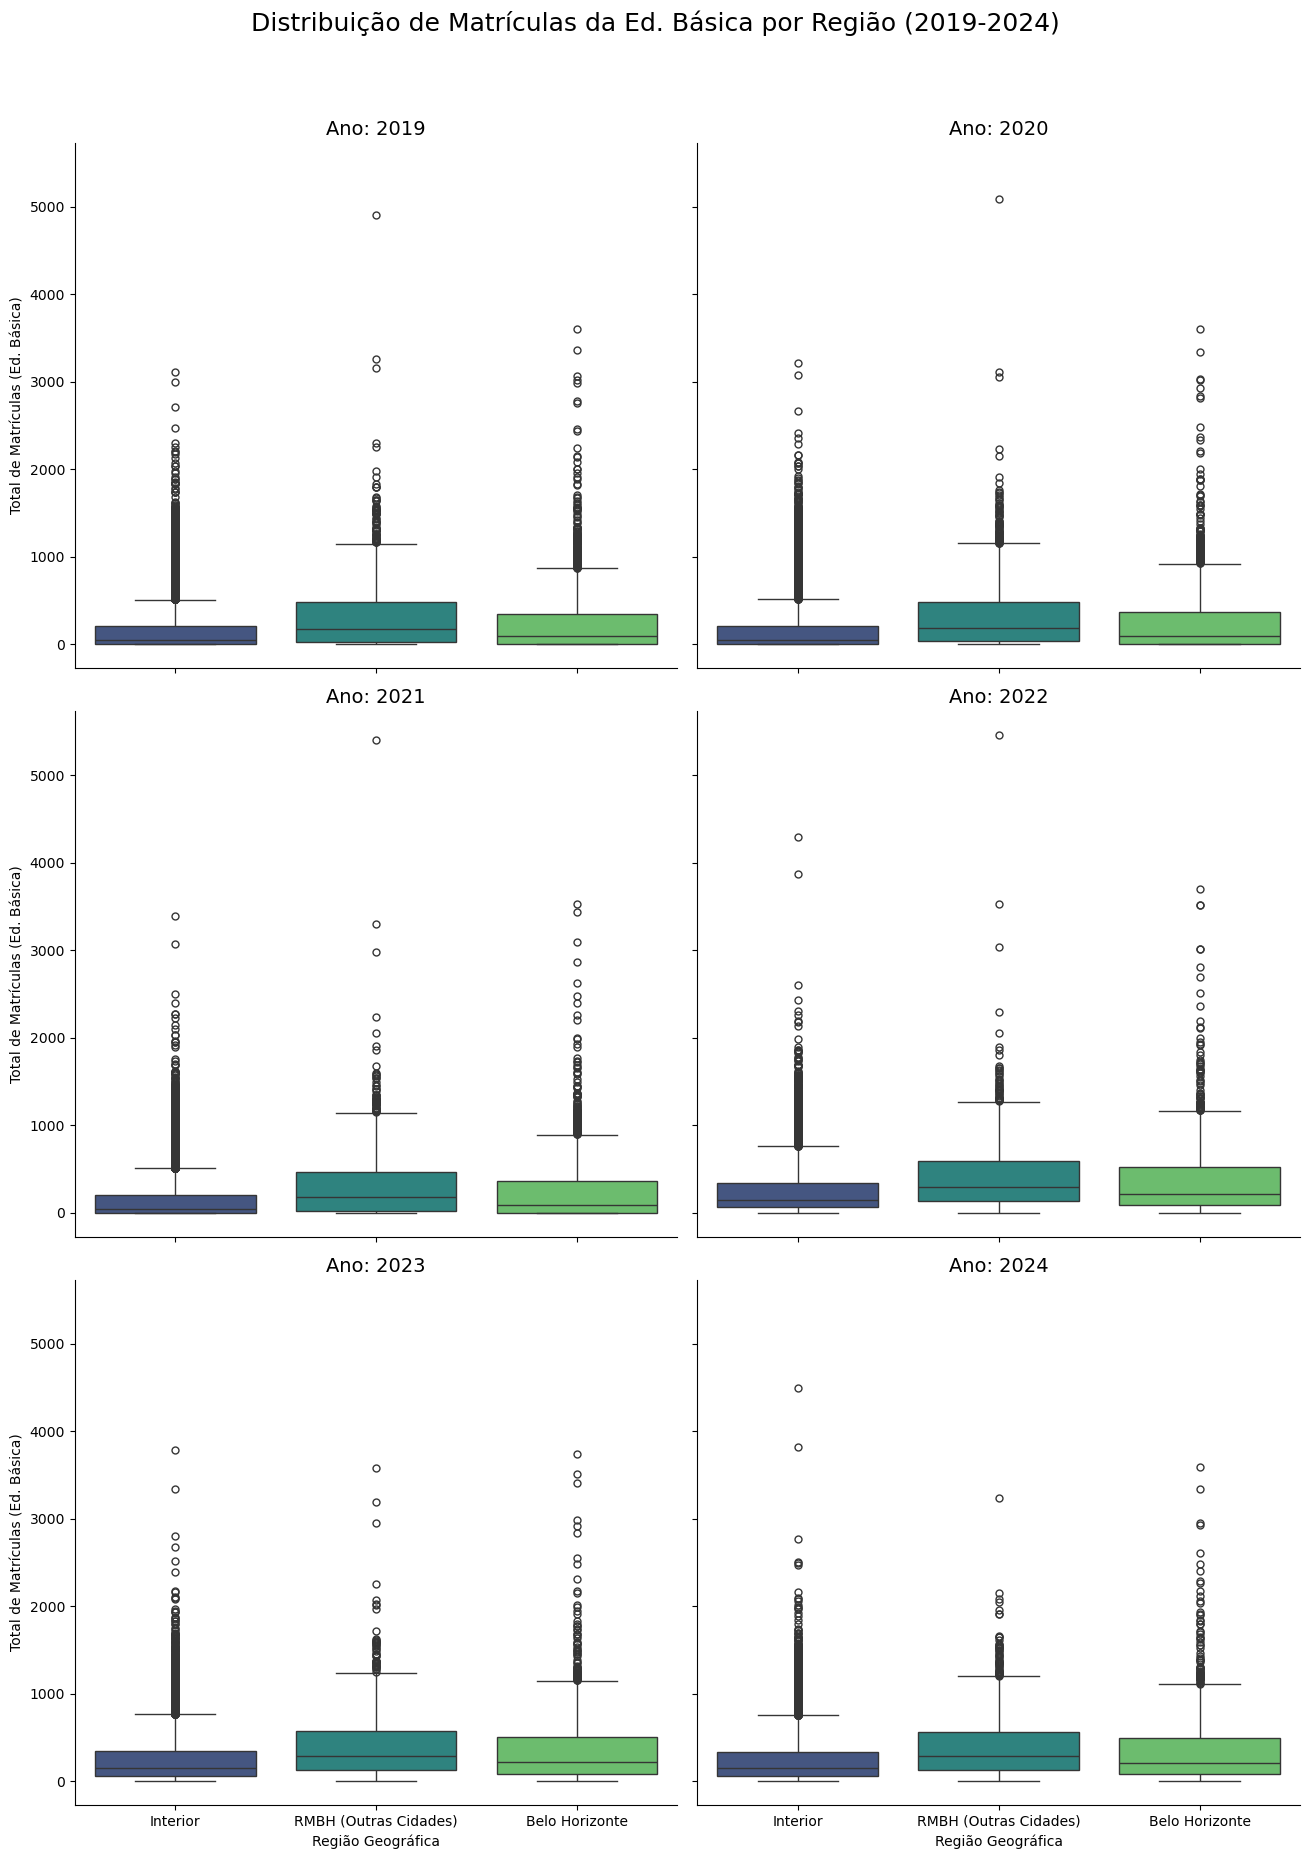

In [91]:
# Usa o catplot que cria múltiplo boxplots um por ano
g = sns.catplot(data = df_educacao_basica_regiao, x = 'regiao', y = 'matriculas_basica_total', hue = 'regiao', legend = False,
    col = 'ano', kind = 'box', order = ['Interior', 'RMBH (Outras Cidades)', 'Belo Horizonte'], palette = 'viridis',
    col_wrap = 2, height = 6, aspect = 1.1)

# Adiciona títulos e rótulos
g.fig.suptitle('Distribuição de Matrículas da Ed. Básica por Região (2019-2024)', y=1.03, fontsize=18)
g.set_axis_labels("Região Geográfica", "Total de Matrículas (Ed. Básica)")
g.set_titles("Ano: {col_name}", size=14)
plt.tight_layout()

# Variável para imprimir a tabela com os valores
valores_boxplot_anuais_educ = df_educacao_basica_regiao.groupby(['ano', 'regiao'])['matriculas_basica_total'].describe()
print("\n--- Valores Estatísticos Anuais dos Boxplots por Região ---")
# Pega a lista de anos únicos do índice da nossa tabela
anos_unicos_educ = valores_boxplot_anuais_educ.index.get_level_values('ano').unique()

# For para imprimir formatado cada tabela
for ano in anos_unicos_educ:
    print(f"\nESTATÍSTICAS PARA O ANO DE {ano}")
    print(valores_boxplot_anuais_educ.loc[ano])

# Mostra o gráfico
plt.show()

**Análise:**
Como esse dataSet faz a contagem de matriculas por escola podemos tirar algumas conclusões, a primeira coisa importante e que durante todo o período de análise a região metropolinada possuiu uma maior média e mediana de alunos matriculados em comparação as outras regiões.\
Porém a principal análise que se pode fazer é que durante a pandemia e após ela houve um fechamento "gritante" de escolas de ensino básico, e esse motivo afetou as médias e medianas de matriculados pois os alunos tiverem que ir para outras escolas o que aumentou esses valores estatísticos, pois tem valores similares de alunos para menos instituições.


--- Valores Estatísticos Anuais dos Boxplots por Região ---

ESTATÍSTICAS PARA O ANO DE 2019
                         count  mean    std  min  25%   50%    75%     max
regiao                                                                    
Belo Horizonte         2171.00 98.92 207.22 0.00 3.00 17.00 110.50 2726.00
Interior              25040.00 23.59  75.90 0.00 1.00  2.00   9.00 1965.00
RMBH (Outras Cidades)  2557.00 21.93  73.57 0.00 1.00  2.00   8.00 1059.00

ESTATÍSTICAS PARA O ANO DE 2020
                         count  mean    std  min  25%   50%   75%     max
regiao                                                                   
Belo Horizonte         2652.00 78.77 181.78 0.00 3.00 13.00 73.00 2481.00
Interior              33230.00 17.75  62.69 0.00 1.00  2.00  7.00 1995.00
RMBH (Outras Cidades)  3731.00 15.72  56.34 0.00 1.00  2.00  7.00  903.00

ESTATÍSTICAS PARA O ANO DE 2021
                         count  mean    std  min  25%  50%   75%     max
regiao                

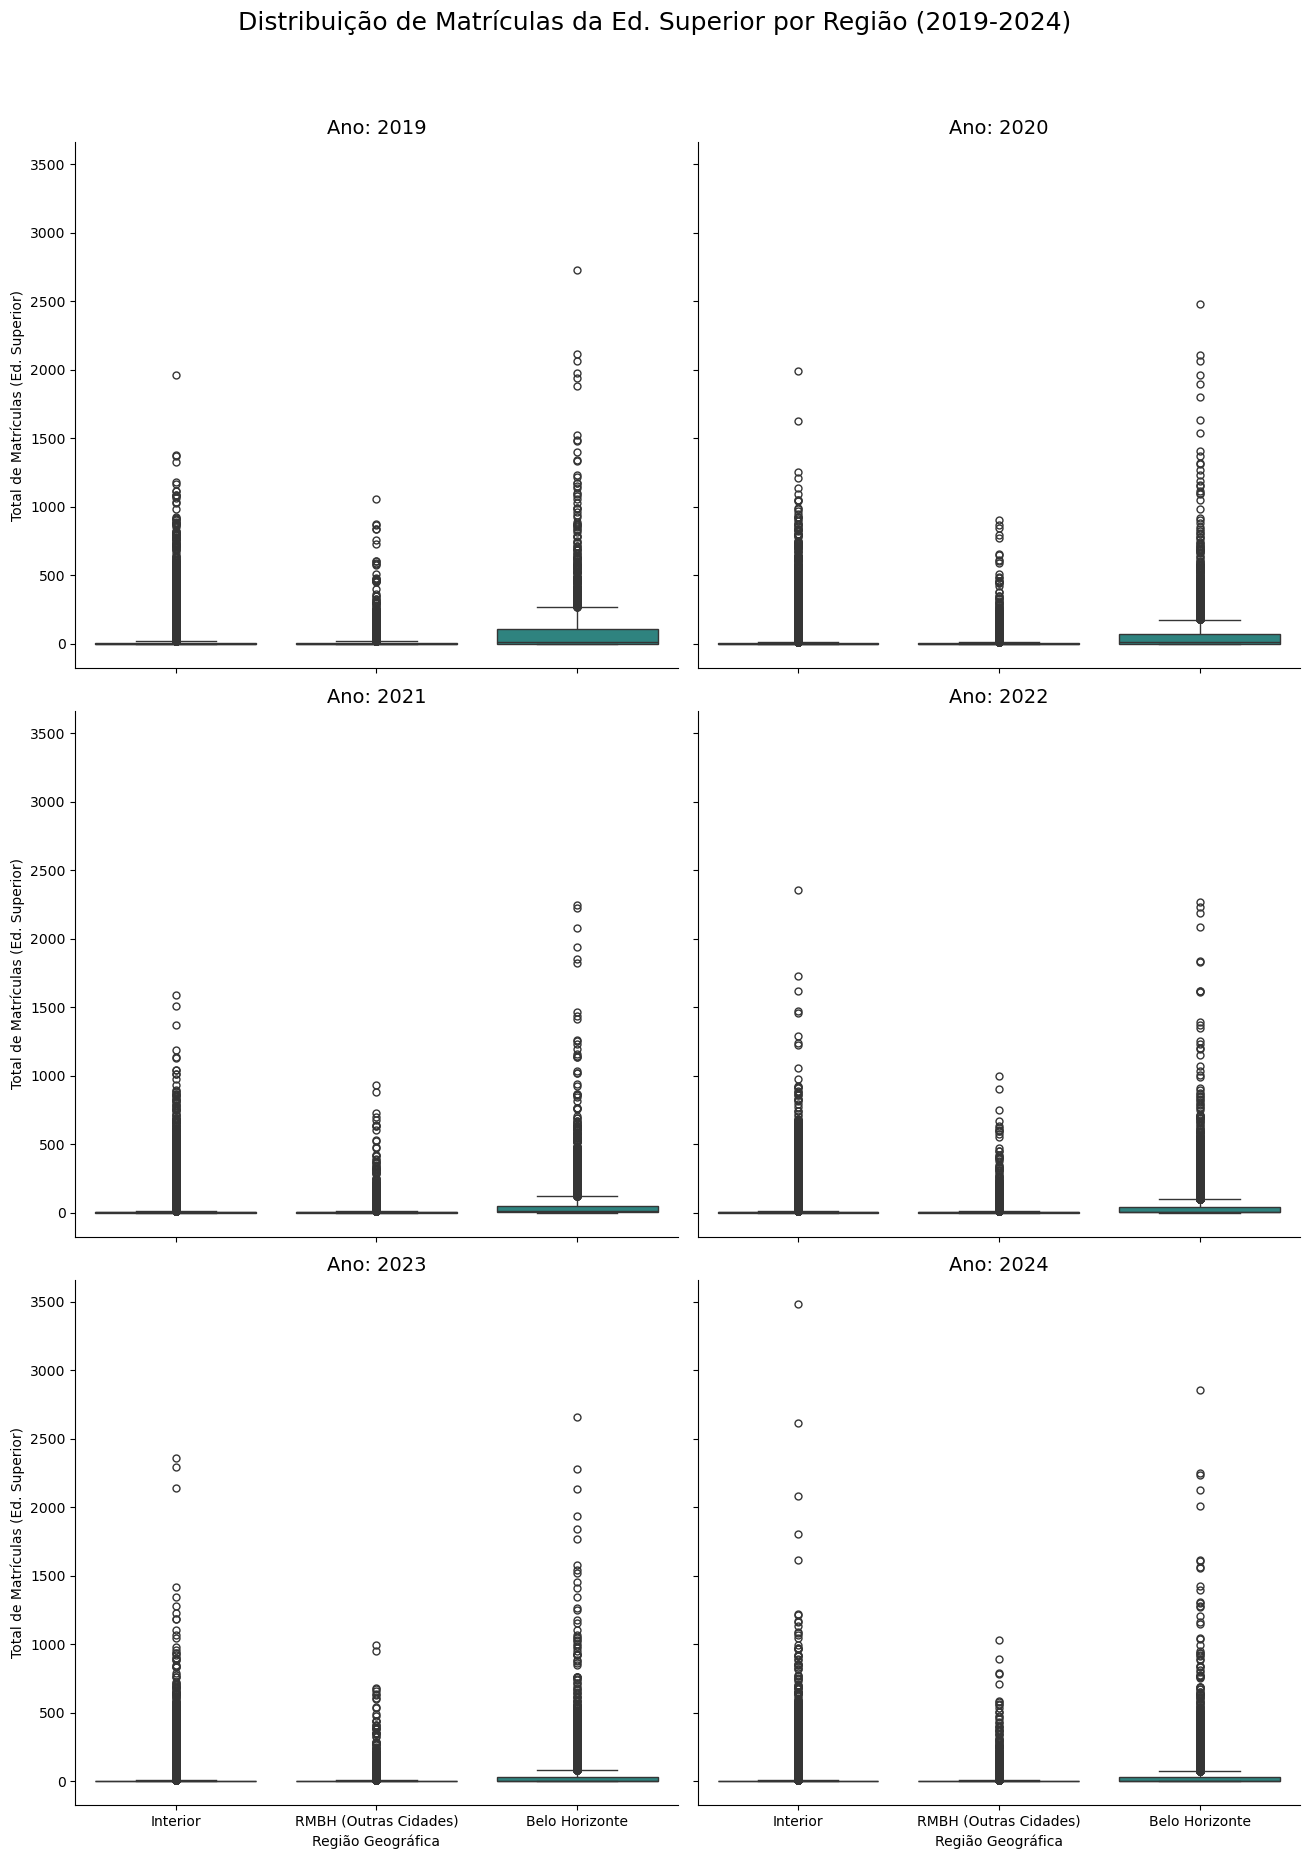

In [92]:
# Usa o catplot que cria múltiplo boxplots um por ano
g = sns.catplot(data = df_educacao_superior_regiao, x = 'regiao', y = 'matriculas_superior_total', hue = 'regiao', legend = False,
    col = 'ano', kind = 'box', order = ['Interior', 'RMBH (Outras Cidades)', 'Belo Horizonte'], palette = 'viridis',
    col_wrap = 2, height = 6, aspect = 1.1)

# Adiciona títulos e rótulos
g.fig.suptitle('Distribuição de Matrículas da Ed. Superior por Região (2019-2024)', y=1.03, fontsize=18)
g.set_axis_labels("Região Geográfica", "Total de Matrículas (Ed. Superior)")
g.set_titles("Ano: {col_name}", size=14)
plt.tight_layout()

# Variável para imprimir a tabela com os valores
valores_boxplot_anuais_educ_superior = df_educacao_superior_regiao.groupby(['ano', 'regiao'])['matriculas_superior_total'].describe()
print("\n--- Valores Estatísticos Anuais dos Boxplots por Região ---")
# Pega a lista de anos únicos do índice da nossa tabela
anos_unicos_educ_superior = valores_boxplot_anuais_educ_superior.index.get_level_values('ano').unique()

# For para imprimir formatado cada tabela
for ano in anos_unicos_educ_superior:
    print(f"\nESTATÍSTICAS PARA O ANO DE {ano}")
    print(valores_boxplot_anuais_educ_superior.loc[ano])

# Mostra o gráfico
plt.show()

**Análise:**
Com a análise desse boxplots, mais uma vez podemos tirar conclusões sobre o aumento de cursos EAD. O count desse dataSet é feito por cursos, como é possível observar houve ao longo dos últimos anos um aumento enorme na quantidade de cursos em todas as regiões, mas principalmente no interior, muito influenciado pela explosão de cursos EAD.\
A partir disso é possível observar que a média e a mediana de matriculados vêm caindo substancialmente, possuindo alta quantidade de cursos com 1 ou 2 matriculados no interior e na região metropolitana, e de 5 a 6 matriculados em Belo Horizonte.\
Esse fator está relacionado a altíssima quantidade de cursos, porém sem alunos suficientes para suprir todos eles, causando esse fenômeno de muitos cursos e poucos matriculados por curso.

In [93]:
# Cria o agregado da criminalidade para a análise de correlação
df_crime_agg = df_criminalidadeMG_completo.groupby(['ano', 'cod_municipio'])['registros'].sum().reset_index()
df_crime_agg = df_crime_agg.rename(columns={'registros': 'total_crimes', 'cod_municipio': 'cod_municipio_6dig'})
df_crime_agg['cod_municipio_6dig'] = df_crime_agg['cod_municipio_6dig'].astype(str).str.strip()
df_crime_agg['ano'] = df_crime_agg['ano'].astype('int64')

# Cria o agregado da educação básica para a análise de correlação
df_educacao_mg['cod_municipio_6dig'] = df_educacao_mg['cod_municipio'].astype(str).str.strip().str[:6]
colunas_basica = ['ano', 'cod_municipio_6dig', 'matriculas_basica_total', 'matriculas_fundamental', 'matriculas_medio', 'matriculas_eja']
colunas_basica_existentes = [col for col in colunas_basica if col in df_educacao_mg.columns]
df_educ_basica_agg = df_educacao_mg[colunas_basica_existentes].groupby(['ano', 'cod_municipio_6dig']).sum().reset_index()
df_educ_basica_agg['ano'] = df_educ_basica_agg['ano'].astype('int64')

# Cria o agregado da educação superior para a análise de correlação
df_educacao_superior['cod_municipio_6dig'] = df_educacao_superior['cod_municipio'].astype(str).str.strip().str[:6]
colunas_superior = ['ano', 'cod_municipio_6dig', 'ingressantes_total', 'matriculas_superior_total', 'concluintes_total']
colunas_superior_existentes = [col for col in colunas_superior if col in df_educacao_superior.columns]
df_educ_superior_agg = df_educacao_superior[colunas_superior_existentes].groupby(['ano', 'cod_municipio_6dig']).sum().reset_index()
df_educ_superior_agg['ano'] = df_educ_superior_agg['ano'].astype('int64')

In [94]:
# Lê o arquivo csv
df_populacao = pd.read_csv('populacao_mg_ano.csv', sep=';', encoding='latin-1', skiprows=4,skipfooter=1,engine='python')

In [95]:
df_populacao.head()

,Município,2019,2020,2021,2022,2023,2024
0,310010 ABADIA DOS DOURADOS,6552.00,6519.00,6471.00,6424.00,6385.00,6365.00
1,310020 ABAETE,23213.00,23244.00,23237.00,23203.00,23181.00,23161.00
2,310030 ABRE CAMPO,14086.00,14160.00,14216.00,14241.00,14278.00,14312.00
3,310040 ACAIACA,4009.00,4015.00,4013.00,4003.00,3981.00,3997.00
4,310050 ACUCENA,9516.00,9423.00,9322.00,9204.00,9097.00,8995.00


In [96]:
df_populacao.isnull().sum()

Município    0
2019         6
2020         6
2021         6
2022         6
2023         6
2024         6
dtype: int64

#### Algumas mudanças serão necessárias para o uso dessa tabela.

In [97]:
# Arruma o csv da população de Minas Gerais
df_populacao = df_populacao.rename(columns={'Município': 'municipio_com_codigo'})
# Cria a nova coluna do codigo
df_populacao['cod_municipio_6dig'] = df_populacao['municipio_com_codigo'].astype(str).str.split(' ').str[0].str.strip() 
# Muda o formato da tabela
df_populacao = df_populacao.melt(id_vars=['cod_municipio_6dig'], var_name='ano', value_name='populacao')
# Converte tipos e confere para deixar apenas números
df_populacao['ano'] = pd.to_numeric(df_populacao['ano'], errors='coerce')
df_populacao['populacao'] = pd.to_numeric(df_populacao['populacao'], errors='coerce')
# Remove os valores nulos
df_populacao = df_populacao.dropna(subset=['ano', 'populacao', 'cod_municipio_6dig']).copy()
# Converte a coluna ano pra inteiro
df_populacao['ano'] = df_populacao['ano'].astype('int64')
df_populacao['cod_municipio_6dig'] = df_populacao['cod_municipio_6dig'].astype(str).str.strip()

In [98]:
# Verifica os nulos
df_populacao.isnull().sum()

cod_municipio_6dig    0
ano                   0
populacao             0
dtype: int64

In [99]:
# Mostra as 5 primeiras linhas
df_populacao.head()

,cod_municipio_6dig,ano,populacao
860,310010,2019,6552.00
861,310020,2019,23213.00
862,310030,2019,14086.00
863,310040,2019,4009.00
864,310050,2019,9516.00


In [100]:
# Lê o CSV do IDH de 2021
df_idh = pd.read_csv('7272-municipiosmg.csv', sep=';', encoding='latin-1')

In [101]:
# Mostra as 5 primeiras linhas
df_idh.head()

,cod_mun_ibge,municipio,uf,sede_ou_comarca_abrangido,cod_mun_ibge_comarca,nome_comarca,pop_est_2019_ibge,idh_m,idh_m_educacao,idh_m_longevidade,idh_m_renda
0,3100104,Abadia dos Dourados,MG,abrangido,3119302,Coromandel,6704.00,0.69,0.56,0.84,0.69
1,3100203,AbaetÃ©,MG,sede,3100203,AbaetÃ©,22690.00,0.70,0.56,0.85,0.72
2,3100302,Abre Campo,MG,sede,3100302,Abre Campo,13311.00,0.65,0.53,0.82,0.65
3,3100401,Acaiaca,MG,abrangido,3152105,Ponte Nova,3920.00,0.63,0.50,0.82,0.61
4,3100500,AÃ§ucena,MG,sede,3100500,AÃ§ucena,10276.00,0.61,0.45,0.84,0.59


In [102]:
# Nomes das colunas no CSV
coluna_cod = 'cod_mun_ibge' 
coluna_idhm = 'idh_m'        
           
# Cria a chave de 6 dígitos (a partir do código de 7 dígitos)
df_idh['cod_municipio_6dig'] = df_idh[coluna_cod].astype(str).str.strip().str[:6]
    
# Converte IDH para número 
df_idh[coluna_idhm] = df_idh[coluna_idhm].astype(str).str.replace(',', '.')
df_idh[coluna_idhm] = pd.to_numeric(df_idh[coluna_idhm], errors='coerce')

# Renomeia e seleciona, garantindo um IDH por município
df_idh = df_idh[['cod_municipio_6dig', coluna_idhm]].rename(columns={coluna_idhm: 'IDHM_REF'}) 
df_idh['cod_municipio_6dig'] = df_idh['cod_municipio_6dig'].astype(str).str.strip()
df_idh = df_idh.drop_duplicates(subset=['cod_municipio_6dig'])

In [103]:
# Verifica os nulos
df_idh.isnull().sum()

cod_municipio_6dig    0
IDHM_REF              0
dtype: int64

In [104]:
# Mostra as 5 primeiras linhas
df_idh.head()

,cod_municipio_6dig,IDHM_REF
0,310010,0.69
1,310020,0.70
2,310030,0.65
3,310040,0.63
4,310050,0.61


In [105]:
# Garante que as chaves de junção são strings limpas em todos os DFs
df_crime_agg['cod_municipio_6dig'] = df_crime_agg['cod_municipio_6dig'].astype(str).str.strip()
df_educ_basica_agg['cod_municipio_6dig'] = df_educ_basica_agg['cod_municipio_6dig'].astype(str).str.strip()
df_educ_superior_agg['cod_municipio_6dig'] = df_educ_superior_agg['cod_municipio_6dig'].astype(str).str.strip()
df_populacao['cod_municipio_6dig'] = df_populacao['cod_municipio_6dig'].astype(str).str.strip()
df_idh['cod_municipio_6dig'] = df_idh['cod_municipio_6dig'].astype(str).str.strip()

# Define o nome final da coluna IDH de referência
coluna_idhm_final = 'IDHM_REF' 

In [106]:
# Faz a junção de todos os dataSets
df_analise_final = pd.merge(df_crime_agg, df_educ_basica_agg, on=['ano', 'cod_municipio_6dig'], how='outer')
df_analise_final = pd.merge(df_analise_final, df_educ_superior_agg, on=['ano', 'cod_municipio_6dig'], how='outer')
df_analise_final = pd.merge(df_analise_final, df_populacao[['ano', 'cod_municipio_6dig', 'populacao']], on=['ano', 'cod_municipio_6dig'], how='left')
df_analise_final = pd.merge(df_analise_final, df_idh, on='cod_municipio_6dig', how='left') 

In [107]:
# Mostra as dimencões do arquivo
df_analise_final.shape

(5118, 12)

In [108]:
# Verifica se tem nulos
df_analise_final.isnull().sum()

ano                             0
cod_municipio_6dig              0
total_crimes                    0
matriculas_basica_total         0
matriculas_fundamental          0
matriculas_medio                0
matriculas_eja                  0
ingressantes_total           2525
matriculas_superior_total    2525
concluintes_total            2525
populacao                       0
IDHM_REF                        0
dtype: int64

Existem valores nulos, pois nem todas as combinações de cidade + ano, tem matriculados em ensino superior cadastrado, eles serão zerados para nao afetar a análise.

In [109]:
# Preenche NaNs com 0
colunas_para_zerar_nans = ['ingressantes_total', 'matriculas_superior_total', 'concluintes_total']
colunas_existentes_para_zerar = [col for col in colunas_para_zerar_nans if col in df_analise_final.columns]
df_analise_final[colunas_existentes_para_zerar] = df_analise_final[colunas_existentes_para_zerar].fillna(0)
  

In [110]:
# Mostra as dimencões do arquivo para ter certeza q não mudou
df_analise_final.shape

(5118, 12)

In [111]:
# Verifica se tem nulos
df_analise_final.isnull().sum()

ano                          0
cod_municipio_6dig           0
total_crimes                 0
matriculas_basica_total      0
matriculas_fundamental       0
matriculas_medio             0
matriculas_eja               0
ingressantes_total           0
matriculas_superior_total    0
concluintes_total            0
populacao                    0
IDHM_REF                     0
dtype: int64

In [112]:
# Calcula as Taxas por 100k de habitantes
df_analise_final = df_analise_final[df_analise_final['populacao'] > 0]   
df_analise_final['taxa_crime_100k'] = (df_analise_final['total_crimes'] / df_analise_final['populacao']) * 100000
df_analise_final['taxa_mat_basica_100k'] = (df_analise_final['matriculas_basica_total'] / df_analise_final['populacao']) * 100000
df_analise_final['taxa_mat_medio_100k'] = (df_analise_final['matriculas_medio'] / df_analise_final['populacao']) * 100000
df_analise_final['taxa_mat_superior_100k'] = (df_analise_final['matriculas_superior_total'] / df_analise_final['populacao']) * 100000
df_analise_final['taxa_concluintes_sup_100k'] = (df_analise_final['concluintes_total'] / df_analise_final['populacao']) * 100000
df_analise_final['taxa_ingressantes_sup_100k'] = (df_analise_final['ingressantes_total'] / df_analise_final['populacao']) * 100000

In [113]:
# Verifica se tem nulos
df_analise_final.isnull().sum()

ano                           0
cod_municipio_6dig            0
total_crimes                  0
matriculas_basica_total       0
matriculas_fundamental        0
matriculas_medio              0
matriculas_eja                0
ingressantes_total            0
matriculas_superior_total     0
concluintes_total             0
populacao                     0
IDHM_REF                      0
taxa_crime_100k               0
taxa_mat_basica_100k          0
taxa_mat_medio_100k           0
taxa_mat_superior_100k        0
taxa_concluintes_sup_100k     0
taxa_ingressantes_sup_100k    0
dtype: int64

In [114]:
# Mostra as 5 primeiras linhas
df_analise_final.head()

,ano,cod_municipio_6dig,total_crimes,matriculas_basica_total,matriculas_fundamental,matriculas_medio,matriculas_eja,ingressantes_total,matriculas_superior_total,concluintes_total,populacao,IDHM_REF,taxa_crime_100k,taxa_mat_basica_100k,taxa_mat_medio_100k,taxa_mat_superior_100k,taxa_concluintes_sup_100k,taxa_ingressantes_sup_100k
0,2019,310010,10,1057.00,703.00,194.00,17.00,0.00,0.00,0.00,6552.00,0.69,152.63,16132.48,2960.93,0.00,0.00,0.00
1,2019,310020,31,4381.00,2457.00,706.00,304.00,138.00,362.00,45.00,23213.00,0.70,133.55,18873.05,3041.40,1559.47,193.86,594.49
2,2019,310030,10,2515.00,1587.00,449.00,132.00,0.00,0.00,0.00,14086.00,0.65,70.99,17854.61,3187.56,0.00,0.00,0.00
3,2019,310040,2,968.00,536.00,191.00,87.00,0.00,0.00,0.00,4009.00,0.63,49.89,24145.67,4764.28,0.00,0.00,0.00
4,2019,310050,16,1666.00,1078.00,360.00,28.00,0.00,0.00,0.00,9516.00,0.61,168.14,17507.36,3783.10,0.00,0.00,0.00



--- Matriz de Correlação Final (Valores Numéricos) ---
                            taxa_crime_100k  IDHM_REF  taxa_mat_basica_100k  \
taxa_crime_100k                        1.00      0.20                  0.17   
IDHM_REF                               0.20      1.00                 -0.18   
taxa_mat_basica_100k                   0.17     -0.18                  1.00   
taxa_mat_medio_100k                    0.00     -0.33                  0.70   
taxa_mat_superior_100k                 0.23      0.42                  0.19   
taxa_ingressantes_sup_100k             0.25      0.46                  0.18   
taxa_concluintes_sup_100k              0.24      0.40                  0.17   

                            taxa_mat_medio_100k  taxa_mat_superior_100k  \
taxa_crime_100k                            0.00                    0.23   
IDHM_REF                                  -0.33                    0.42   
taxa_mat_basica_100k                       0.70                    0.19   
taxa_mat_me

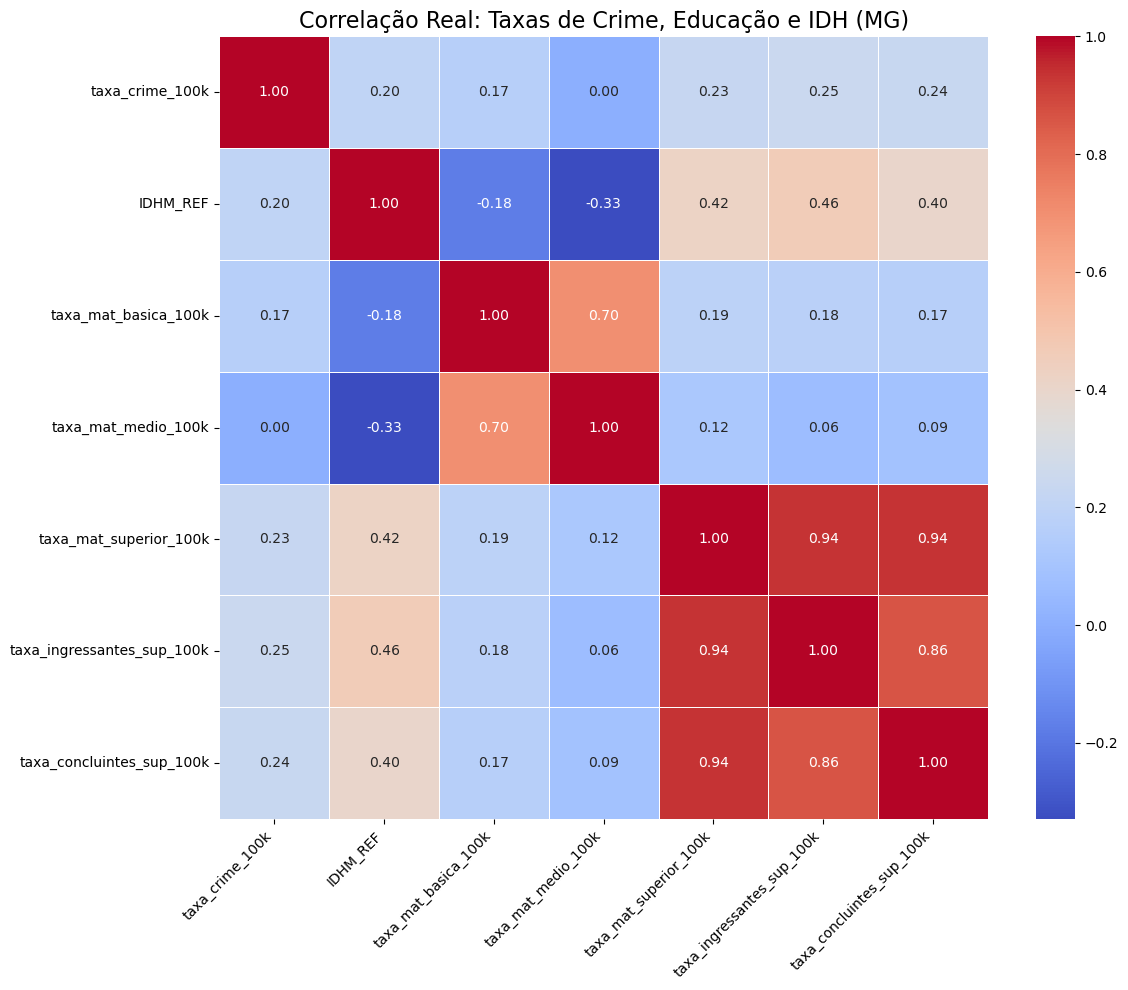

In [115]:
# Retira cidades em que a variância é zero para não afetar a correlação
colunas_para_verificar = ['taxa_crime_100k', coluna_idhm_final, 'taxa_mat_basica_100k', 'taxa_mat_medio_100k', 'taxa_mat_superior_100k', 'taxa_ingressantes_sup_100k', 'taxa_concluintes_sup_100k']
colunas_existentes = [col for col in colunas_para_verificar if col in df_analise_final.columns]
variancias = df_analise_final[colunas_existentes].var()
colunas_problematicas = variancias[variancias.abs() < 1e-9].index.tolist() 
colunas_correlacao_final = [col for col in colunas_existentes if col not in colunas_problematicas]

# Faz a tabela de correlação
df_para_correlacao = df_analise_final[colunas_correlacao_final]
matriz_correlacao_final = df_para_correlacao.corr() 
print("\n--- Matriz de Correlação Final (Valores Numéricos) ---")
print(matriz_correlacao_final)

# Faz e imprime o gráfico de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao_final, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10}) 
plt.title('Correlação Real: Taxas de Crime, Educação e IDH (MG)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Conclusão Final
**Dados Utilizados:**
Ao longo desse trabalho foram utilizadas diversas fontes de dados difentes referentes a criminalidade, educação, população e IDH, todos eles foram retirados do próprio site do governo do Brasil ou de Minas Gerais.\
\
**Correlação:**
A primeira análise que podemos tirar é que existe uma correlação positiva baixa na relação entre a criminalidade e a escolaridade, girando em torno de 0,20 positiva.\
\
Outro fator interessante é que existe uma correlação alta entre o ensino básico geral com o ensino médio, e dos ingressantes, matriculados e concluintes do ensino superior. Porém é surpreendente a baixa correlação entre o ensino básico e o superior, o que pode indicar que poucas pessoas que fazem o ensino básico partem para o ensino superior.\
\
Agora, comparando as correlações com o IDH médio de 2021 Minas Gerais. A criminalidade possui uma correlação positiva baixa, em cerca de 0,20. Já a educação básica e o ensino médio possuem correlações negativas, o que quer dizer que as cidades em que tem menos matriculados no ensino básico possuem maior IDH, o que é um fator curioso, possivelmente relacionado a faixa etária desses municípios que possuem mais adultos e trabalhadores.\
Já a educação superior possui uma correlação média com o IDH em cerca de 0,40 nas taxas analizadas, o que indica que quanto mais matriculados, ingressantes e concluintes no ensino superior, maior o IDH da cidade.